# <font color=red> Credit Card Fraud Detection </font>

### Importing packages

In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings('ignore')

## <font color=red> Exploratory data analysis </font>

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#observe the different feature type present in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

- There are no missing values in the dataset
- All the features are numeric

In [4]:
#Distribution of our classes
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

Percentage of Non-fraudulent transactions: 99.83
Percentage of Fraudulent transactions: 0.17 



Text(0.5, 0, 'Class')

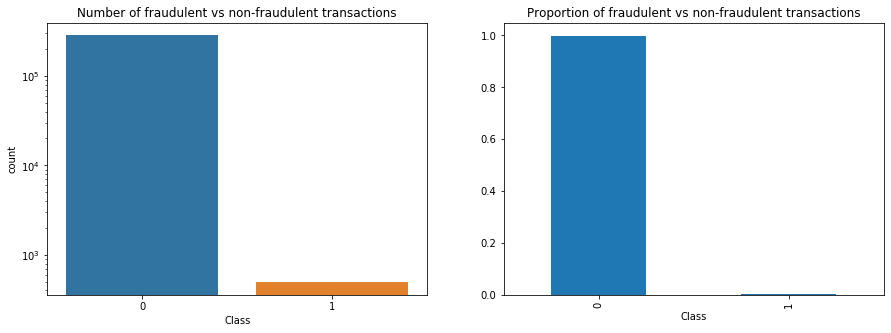

In [5]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
print('Percentage of Non-fraudulent transactions:', round(normal_share,2))
print('Percentage of Fraudulent transactions:', round(fraud_share,2), '\n')
f,ax=plt.subplots(1,2,figsize=(15,5))

# Count plot
#plt.subplot(121)
sns.countplot(df['Class'],ax=ax[0])
ax[0].set_yscale('log')
ax[0].set_title('Number of fraudulent vs non-fraudulent transactions' )

# Percentage plot
#plt.subplot(122)
df['Class'].value_counts(normalize=True).plot(kind='bar',ax=ax[1])
ax[1].set_title('Proportion of fraudulent vs non-fraudulent transactions' )
ax[1].set_xlabel('Class',rotation=0)

A very high class imbalance can be observed in the dataset

### Relation of class with time

In [6]:
df['Time']=(df['Time']/3600).round(0) # converting to seconds to hours

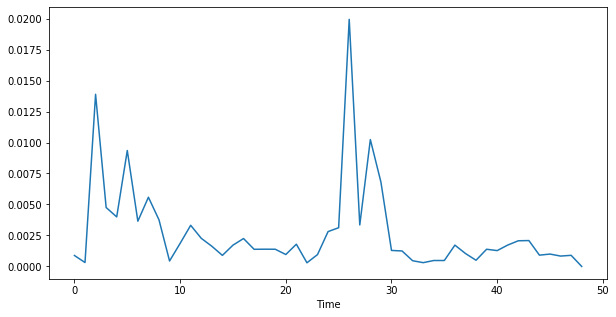

In [7]:
df.groupby(['Time'])['Class'].mean().plot(kind='line',figsize=[10,5])
plt.show()

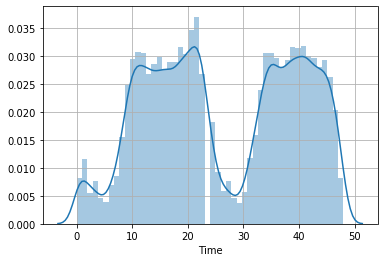

In [8]:
# Plotting the distribution
sns.distplot(df['Time'])
plt.grid(which='both')

It can be observed that the number of transactions are minimum for 5 to 6 hours on both days.

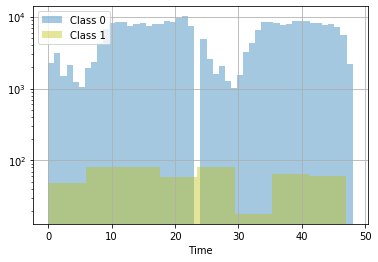

In [9]:
#Distribution of Time variable Classwise
sns.distplot(df.loc[df['Class']==0]['Time'],kde=False)
sns.distplot(df.loc[df['Class']==1]['Time'],kde=False,color='y')
plt.legend(['Class 0', 'Class 1']) 
plt.yscale('log')
plt.grid(which='major')


The distribution for fraudulent transaction is non- gausssian.
A dip in the number of transactions after 30 hours from the time of observation is noted. However the number again increases back after 7 hours approximately

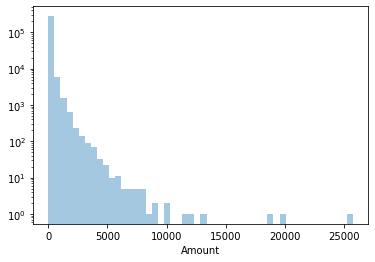

In [10]:
sns.distplot(df['Amount'],kde=False)
plt.yscale('log')

 The Amount variable is positively skewed

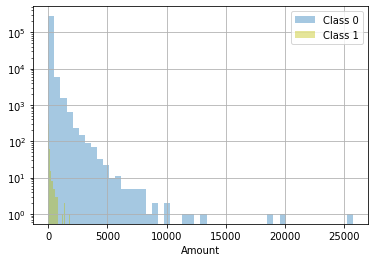

In [11]:
#observe the distribution of the Amount variable for the two classses separately
sns.distplot(df.loc[df['Class']==0]['Amount'],kde=False)
sns.distplot(df.loc[df['Class']==1]['Amount'],kde=False,color='y')
plt.legend(['Class 0', 'Class 1' ])
plt.yscale('log')
plt.grid(which='major')

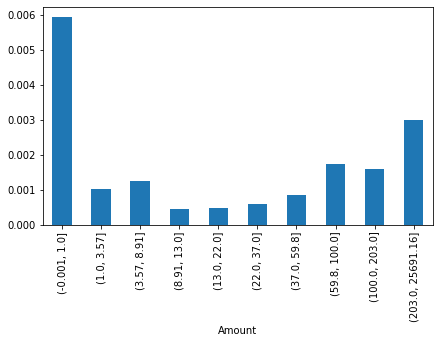

In [12]:
(df.groupby(pd.qcut(df['Amount'],np.arange(0,1.05,0.1)))['Class'].mean()).plot.bar(figsize=[7,4])
plt.show()

- Fraud is high for both very low and very high transactions

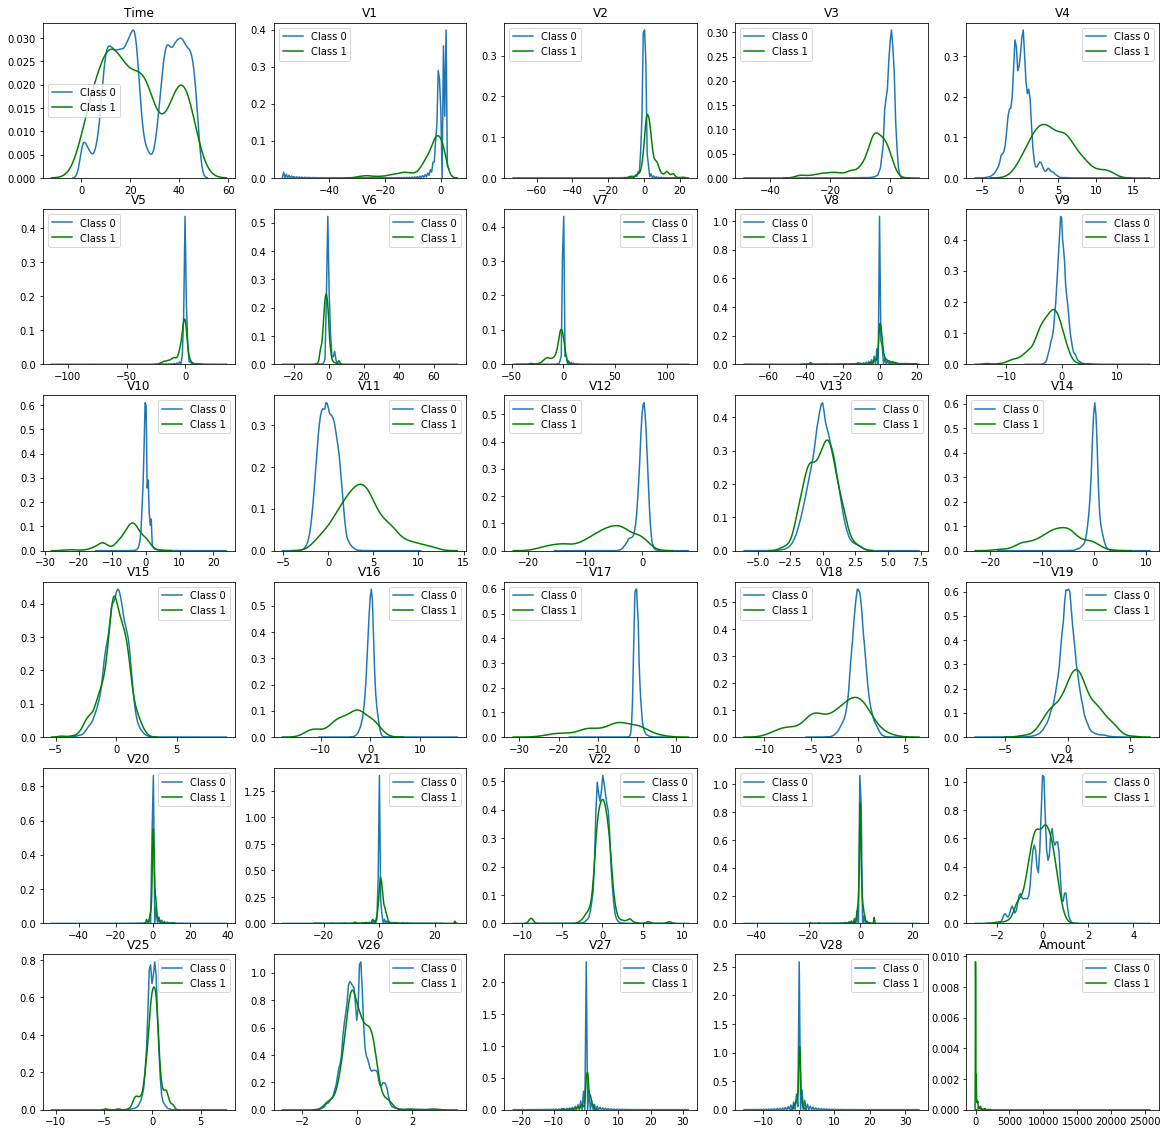

In [13]:
# plotting the distribution for all the  variables
df_col = df.columns.tolist() # get the list of variables
df_col.pop() # remove the class variable


fig, ax = plt.subplots(6,5,figsize=(20,20))
i=1
for col in df_col:
 plt.subplot(6,5,i) 
 sns.kdeplot(df.loc[df['Class']==0][col])
 sns.kdeplot(df.loc[df['Class']==1][col],color='g')
 plt.legend(['Class 0', 'Class 1' ])
 plt.title(col)
 i+=1

-  All the PCA transformed variables follow Guassian distribution as expected
- Almost all the variables are skewed and hence they have to be corrected before model building
- The distribution of a few features like V3,V4,V9,V10,V11,V14,V16,V17 and v18 are more distinct than the others for each class

In [14]:
# Drop unnecessary columns
# Since the feature corresponding to time will not help in model building, it is dropped
df.drop('Time', axis=1, inplace=True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [15]:
# Correlation
corrmat = df.corr()
corrmat.loc['Class'].sort_values()

V17      -0.326481
V14      -0.302544
V12      -0.260593
V10      -0.216883
V16      -0.196539
V3       -0.192961
V7       -0.187257
V18      -0.111485
V1       -0.101347
V9       -0.097733
V5       -0.094974
V6       -0.043643
V24      -0.007221
V13      -0.004570
V15      -0.004223
V23      -0.002685
V22       0.000805
V25       0.003308
V26       0.004455
Amount    0.005632
V28       0.009536
V27       0.017580
V8        0.019875
V20       0.020090
V19       0.034783
V21       0.040413
V2        0.091289
V4        0.133447
V11       0.154876
Class     1.000000
Name: Class, dtype: float64

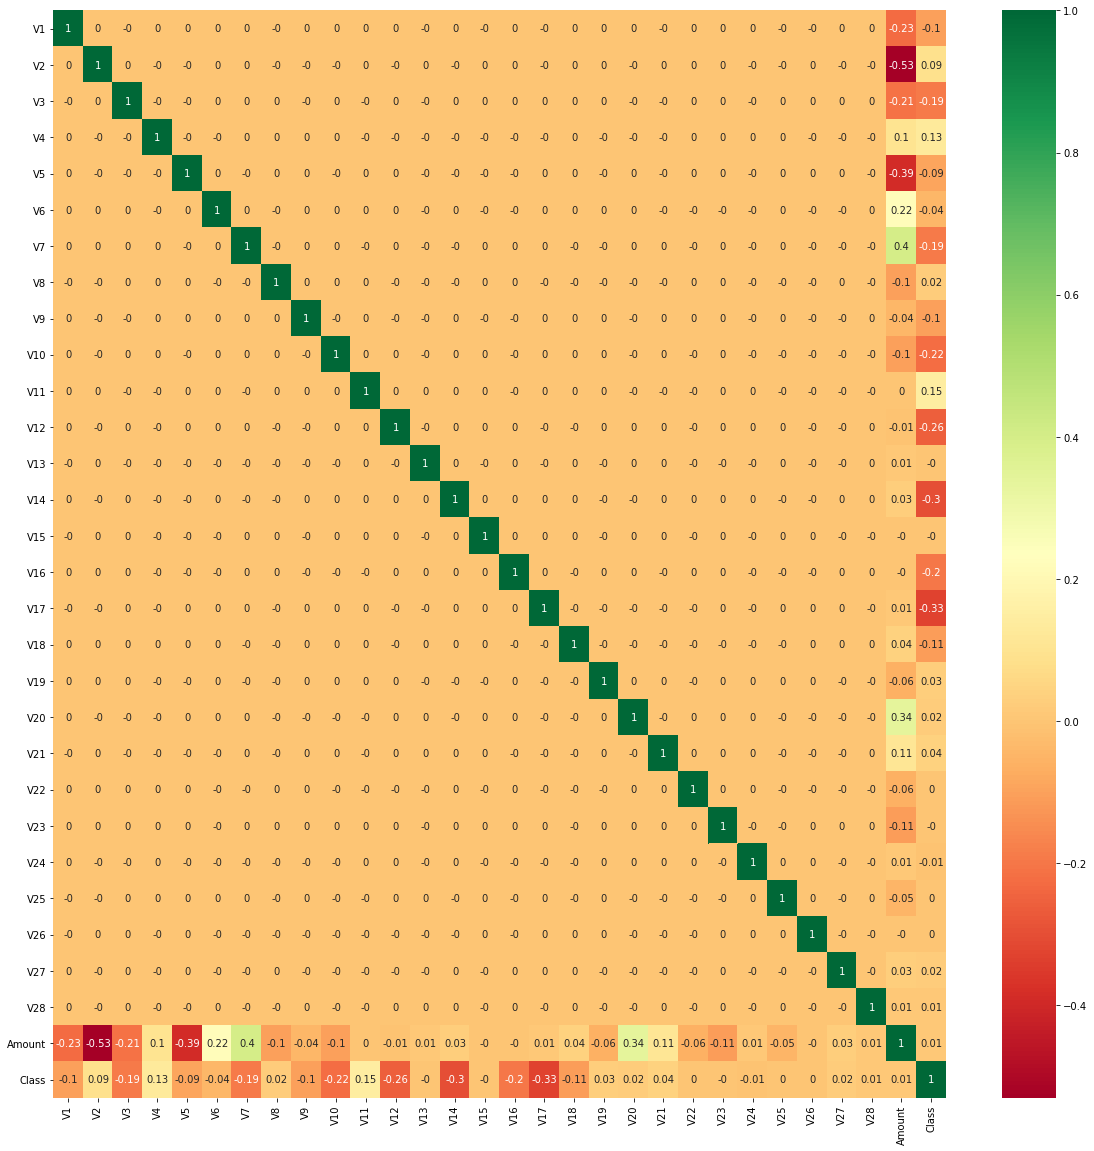

In [16]:
plt.figure(figsize=(20,20))
sns.heatmap(round(corrmat,2),annot=True,cmap="RdYlGn")
plt.show()


- As expected the PCA transformed variables have no correlation among them

## <font color=red> Splitting the data into train & test data </font>

In [17]:
y = df['Class']
df.drop('Class', axis=1, inplace=True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [18]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1,test_size=0.3,random_state=42)

for train_index,test_index in sss.split(df,y):
  X_train, X_test = df.iloc[train_index], df.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [19]:
print('Shape of X_train is ',X_train.shape, ' & shape of y_train is', y_train.shape)
print('Shape of X_test is ',X_test.shape, ' & shape of y_test is', y_test.shape)

Shape of X_train is  (199364, 29)  & shape of y_train is (199364,)
Shape of X_test is  (85443, 29)  & shape of y_test is (85443,)


In [20]:
# Ensuring stratified split
print('Total number of fraudulent transactions is ', np.sum(y), '& percentage of fraudulent transactions is:', round((100*np.sum(y))/df.shape[0],2))
print('Number of fraudulent transactions in training data is ',np.sum(y_train), '& percentage of fraudulent transactions is:', round(100*np.sum(y_train)/X_train.shape[0],2))
print('Number of fraudulent transactions in test data is ',np.sum(y_test), '& percentage of fraudulent transactions is:', round(100*np.sum(y_test)/X_test.shape[0],2))

Total number of fraudulent transactions is  492 & percentage of fraudulent transactions is: 0.17
Number of fraudulent transactions in training data is  344 & percentage of fraudulent transactions is: 0.17
Number of fraudulent transactions in test data is  148 & percentage of fraudulent transactions is: 0.17


### Plotting the distribution of a variable

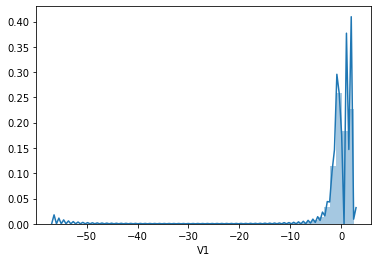

In [21]:
sns.distplot(X_train.iloc[:,0])
plt.show()

### Handling the skewness of the distribution & making it more gaussian

In [22]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(copy=False)
pt.fit_transform(X_train)

array([[-0.2676968 ,  0.40478241, -0.03758163, ...,  0.57846416,
         0.26703825, -0.61949392],
       [ 1.16716777, -0.20178163, -1.38569586, ..., -0.19553705,
        -0.16652054,  1.11976495],
       [-0.79237276, -2.38547895, -0.98774517, ..., -0.78377484,
         0.70492067,  2.26522877],
       ...,
       [-0.95789142,  0.36893244,  1.19348149, ..., -1.09956993,
         0.14867526,  0.32648629],
       [ 0.52069681, -0.03697308,  0.22085485, ...,  0.06652736,
         0.08621695,  0.44474337],
       [-0.57669208,  0.45426788,  1.43292007, ...,  0.93938912,
         0.6400706 , -0.63052653]])

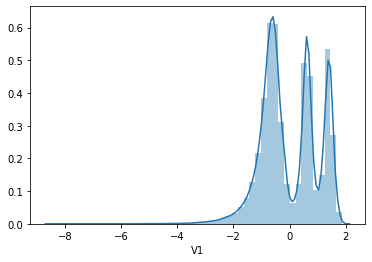

In [23]:
sns.distplot(X_train.iloc[:,0])
plt.show()

The transformed variable is standardized and less skewed

# <font color=red> Model Building </font>

The following algorithms are used on the imbalanced dataset for model building on the imbalanced dataset
 - Logistic Regression
 - Linear SVC
 - Random Forest
 - XGBoost

In [25]:
# creating stratified KFold
from sklearn.model_selection import StratifiedKFold

num_folds = 3 
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

## Logistic Regression - Imbalanced dataset

In [26]:
from sklearn.linear_model import LogisticRegression

In [273]:
logreg = LogisticRegression(random_state=42, solver='lbfgs', max_iter=1000, n_jobs=-1)

In [274]:
from sklearn.model_selection import GridSearchCV

#### Tuning hyperparmeters

In [275]:
hyper_params = {'C':[0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]}

In [276]:
# Grid Search
scoring = {'AUC':'roc_auc', 'REC':'recall', 'PRE':'precision','ACC':'accuracy'}
model_cv = GridSearchCV(logreg, 
                        cv= skf, 
                        param_grid=hyper_params,
                        return_train_score=True, 
                        scoring=scoring,
                        refit='REC')

In [277]:
%%time
model_cv.fit(X_train, y_train)

CPU times: user 4.9 s, sys: 460 ms, total: 5.36 s
Wall time: 1min 6s


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=LogisticRegression(max_iter=1000, n_jobs=-1,
                                          random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]},
             refit='REC', return_train_score=True,
             scoring={'ACC': 'accuracy', 'AUC': 'roc_auc', 'PRE': 'precision',
                      'REC': 'recall'})

In [278]:
cv_res = pd.DataFrame(model_cv.cv_results_)

In [279]:
cv_res.sort_values(by='rank_test_REC')[['param_C','rank_test_REC','mean_test_REC','rank_test_AUC','mean_test_AUC']]

,param_C,rank_test_REC,mean_test_REC,rank_test_AUC,mean_test_AUC
4,10,1,0.662802,4,0.982322
5,100,1,0.662802,5,0.982309
6,1000,1,0.662802,6,0.982308
3,1,4,0.659878,3,0.982453
2,0.1,5,0.654055,2,0.983291
1,0.01,6,0.604628,1,0.983778
0,0.001,7,0.430333,7,0.980479


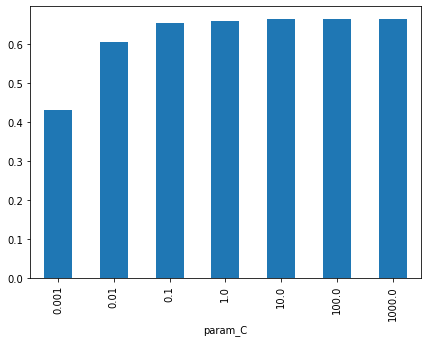

In [283]:
plt.figure(figsize=[7,5])
cv_res.groupby('param_C')['mean_test_REC'].mean().plot.bar()
plt.show()

**Best recall scores and estimator**

In [281]:
print("Best Recall: ", model_cv.best_score_)
print("Best AUC: ", cv_res.mean_test_AUC.max())

Best Recall:  0.6628019323671497
Best AUC:  0.9837775304943882


In [284]:
model_cv.best_params_

{'C': 10.0}

In [285]:
# Using the best parameters for buidling model
from sklearn.model_selection import cross_validate
logreg = LogisticRegression(C=10,random_state=42, solver='lbfgs', max_iter=1000, n_jobs=-1)

In [286]:
score = ['accuracy','precision','recall','roc_auc']
scores = cross_validate(logreg, X_train, y_train,
                               scoring=score,cv=skf,
                               return_train_score=True)

In [287]:
pd.DataFrame(scores)

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_roc_auc,train_roc_auc
0,3.369715,0.062085,0.999293,0.999285,0.904762,0.894118,0.660870,0.663755,0.994343,0.981409
1,2.856719,0.064015,0.999263,0.999263,0.883721,0.883041,0.660870,0.659389,0.982769,0.988026
2,3.252811,0.063105,0.999233,0.999315,0.853933,0.906433,0.666667,0.673913,0.969855,0.989660


In [288]:
pd.DataFrame(scores).mean().sort_index()

fit_time           3.159748
score_time         0.063068
test_accuracy      0.999263
test_precision     0.880805
test_recall        0.662802
test_roc_auc       0.982322
train_accuracy     0.999288
train_precision    0.894530
train_recall       0.665686
train_roc_auc      0.986365
dtype: float64

## Linear SVC - Imbalanced dataset

In [36]:
from sklearn.metrics import classification_report

In [37]:
from sklearn.svm import LinearSVC

In [38]:
svc = LinearSVC(random_state=42, tol=1e-5)

In [39]:
from sklearn.model_selection import cross_val_score, cross_validate

In [40]:
%%time
scoring = ['accuracy','precision','recall','roc_auc']
scores = cross_validate(svc, X_train, y_train, 
                        scoring=scoring,
                        cv=skf,
                        return_train_score=True)

CPU times: user 1min 22s, sys: 117 ms, total: 1min 22s
Wall time: 1min 21s


In [41]:
pd.DataFrame(scores)

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_roc_auc,train_roc_auc
0,30.021588,0.083944,0.999428,0.999376,0.913978,0.880208,0.739130,0.737991,0.994357,0.982835
1,29.079094,0.061032,0.999233,0.999270,0.890244,0.897590,0.634783,0.650655,0.964346,0.972598
2,21.700842,0.063425,0.999428,0.999406,0.880000,0.899471,0.771930,0.739130,0.973094,0.989785


In [42]:
pd.DataFrame(scores).mean().sort_index()

fit_time           26.933841
score_time          0.069467
test_accuracy       0.999363
test_precision      0.894741
test_recall         0.715281
test_roc_auc        0.977266
train_accuracy      0.999350
train_precision     0.892423
train_recall        0.709259
train_roc_auc       0.981739
dtype: float64

## Random Forest - Imbalanced Dataset

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
# Building a model with default hyperparamers
rf = RandomForestClassifier(random_state=42,n_jobs=-1)

In [45]:
%%time
score = ['accuracy','precision','recall','roc_auc']
scores = cross_validate(rf, X_train, y_train, 
                        scoring=score,cv=skf,
                        return_train_score=True)


CPU times: user 20 s, sys: 225 ms, total: 20.3 s
Wall time: 2min 13s


In [46]:
pd.DataFrame(scores)

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_roc_auc,train_roc_auc
0,42.499156,0.771375,0.999624,1.000000,0.989130,1.0,0.791304,1.000000,0.959474,1.0
1,41.379877,0.684472,0.999413,0.999992,0.872549,1.0,0.773913,0.995633,0.950470,1.0
2,43.077454,0.796620,0.999458,1.000000,0.897959,1.0,0.771930,1.000000,0.941534,1.0


In [47]:
pd.DataFrame(scores).mean().sort_index()

fit_time           42.318829
score_time          0.750822
test_accuracy       0.999498
test_precision      0.919880
test_recall         0.779049
test_roc_auc        0.950493
train_accuracy      0.999997
train_precision     1.000000
train_recall        0.998544
train_roc_auc       1.000000
dtype: float64

#### Tuning Hyperparameters

In [48]:
from sklearn.model_selection import RandomizedSearchCV

In [49]:
# parameters to build the model on
param_grid = {
    'max_depth': [5,10],
    'min_samples_split': [5,15,20,25,30],
     }

# instantiate the model
rf = RandomForestClassifier(warm_start=True, random_state=100)

# fit tree on training data
rs = RandomizedSearchCV(estimator = rf, 
                        param_distributions = param_grid, 
                        cv = skf, n_jobs = -1,verbose = 1,
                        scoring='roc_auc',
                        return_train_score=True,)

In [50]:
%%time
rs.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 12.7min finished


CPU times: user 1min 50s, sys: 75.1 ms, total: 1min 50s
Wall time: 14min 30s


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
                   estimator=RandomForestClassifier(random_state=100,
                                                    warm_start=True),
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10],
                                        'min_samples_split': [5, 15, 20, 25,
                                                              30]},
                   return_train_score=True, scoring='roc_auc', verbose=1)

In [51]:
print('We can get roc of',rs.best_score_,'using',rs.best_params_)

We can get roc of 0.9772342232469229 using {'min_samples_split': 15, 'max_depth': 10}


#### Using the best hyperparameters for model building

In [289]:
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_split=15, 
                             random_state=100,
                             n_jobs = -1,
                             verbose=1)

In [290]:
%%time
# Scoring
score = ['accuracy','precision','recall','roc_auc']
scores = cross_validate(rfc, X_train, y_train, 
                        scoring=score, 
                        cv=skf, 
                        return_train_score=True)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   28.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=

CPU times: user 14.6 s, sys: 200 ms, total: 14.8 s
Wall time: 1min 41s


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.4s finished


In [291]:
pd.DataFrame(scores)

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_roc_auc,train_roc_auc
0,28.626686,0.684579,0.999564,0.999616,0.967391,0.958763,0.773913,0.812227,0.984660,0.998722
1,34.942436,0.801368,0.999323,0.999624,0.836538,0.958974,0.756522,0.816594,0.968616,0.999814
2,32.044489,0.599746,0.999428,0.999661,0.887755,0.969543,0.763158,0.830435,0.978427,0.999234


In [292]:
pd.DataFrame(scores).mean().sort_index()

fit_time           31.871204
score_time          0.695231
test_accuracy       0.999438
test_precision      0.897228
test_recall         0.764531
test_roc_auc        0.977234
train_accuracy      0.999634
train_precision     0.962427
train_recall        0.819752
train_roc_auc       0.999256
dtype: float64

## XGBoost

In [28]:
from xgboost import XGBClassifier

In [57]:
# Building a model with default hyperparameters
xgb=XGBClassifier(random_state=42,n_jobs=-1)

In [58]:
score = ['accuracy','precision','recall','roc_auc']
scores_xgb_def = cross_validate(xgb, X_train, y_train, 
                                scoring=score,
                                cv=skf, 
                                return_train_score=True)

In [59]:
xgb_df=pd.DataFrame(scores_xgb_def)
xgb_df.mean().sort_index()

fit_time           45.611606
score_time          0.600151
test_accuracy       0.999564
test_precision      0.939173
test_recall         0.799415
test_roc_auc        0.980110
train_accuracy      1.000000
train_precision     1.000000
train_recall        1.000000
train_roc_auc       1.000000
dtype: float64

#### Tuning Hyperparameters 

In [60]:
# specify range of hyperparameters
param_grid = {'max_depth':[2,3,5]}
              
# specify model
xgb_model = XGBClassifier(random_state=42, n_jobs=-1)

#Randomized Search
rs = RandomizedSearchCV(estimator = xgb_model, 
                        param_distributions = param_grid, 
                        scoring= 'roc_auc', 
                        cv = skf, n_jobs=-1,
                        verbose = 1,
                        refit = "REC",
                        return_train_score=True)      

In [61]:
%%time
rs.fit(X_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  3.3min finished


CPU times: user 37.1 s, sys: 79.9 ms, total: 37.2 s
Wall time: 3min 54s


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=-1,
                                           num_parallel_tree=None,
                                           random

In [62]:
rs.best_params_

{'max_depth': 2}

In [63]:
# Let us tune other params by setting max_depth=2
param_grid = {'sub_sample':[0.5,0.8,1],
              'lr':[0.2,0.5,0.6,0.8]
             }
              
# specify model
xgb_model = XGBClassifier(max_depth=2,random_state=42,n_jobs=-1)

#Randomized Search
rs = RandomizedSearchCV(estimator = xgb_model, 
                        param_distributions = param_grid, 
                        scoring= 'roc_auc', 
                        cv = skf, n_jobs=-1,
                        verbose = 1,
                        refit = "REC",
                        return_train_score=True)    

In [64]:
%%time
rs.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  6.6min finished


[13:06:31] WARNING: /workspace/src/learner.cc:480: 
Parameters: { lr, sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


CPU times: user 36 s, sys: 148 ms, total: 36.1 s
Wall time: 7min 13s


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=2,
                                           min_child_weight=None, mis...
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=-1,
                                           num_parallel_tree=None,
                                           random_state=42

In [65]:
print('We can get roc of',rs.best_score_,'using',rs.best_params_)

We can get roc of 0.9806271609988869 using {'sub_sample': 0.5, 'lr': 0.2}


#### Using the model with best hyperparameters

In [67]:
xgb=XGBClassifier(learning_rate=0.2,
                  sub_sample = 0.5,
                  max_depth=2,
                  random_state=42,
                  n_jobs=-1,
                  verbose=1)

In [68]:
scoring = ['accuracy','precision','recall','roc_auc']
scores_xgb = cross_validate(xgb, X_train, y_train, 
                            scoring=scoring,
                            cv=skf,
                            return_train_score=True)

[13:19:27] WARNING: /workspace/src/learner.cc:480: 
Parameters: { sub_sample, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:19:51] WARNING: /workspace/src/learner.cc:480: 
Parameters: { sub_sample, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:20:14] WARNING: /workspace/src/learner.cc:480: 
Parameters: { sub_sample, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please 

In [69]:
pd.DataFrame(scores_xgb)

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_roc_auc,train_roc_auc
0,22.766203,0.342929,0.999624,0.999692,0.978723,0.965347,0.800000,0.851528,0.990624,0.999261
1,22.775297,0.356423,0.999458,0.999714,0.876190,0.979899,0.800000,0.851528,0.976616,0.999532
2,23.791541,0.346138,0.999443,0.999737,0.873786,0.985075,0.789474,0.860870,0.978547,0.999256


In [70]:
pd.DataFrame(scores_xgb).mean().sort_index()

fit_time           23.111014
score_time          0.348497
test_accuracy       0.999508
test_precision      0.909567
test_recall         0.796491
test_roc_auc        0.981929
train_accuracy      0.999714
train_precision     0.976774
train_recall        0.854642
train_roc_auc       0.999350
dtype: float64

### Comparison of performance metrics for different models 

The metrics shown below are the mean of test set in cross validation

!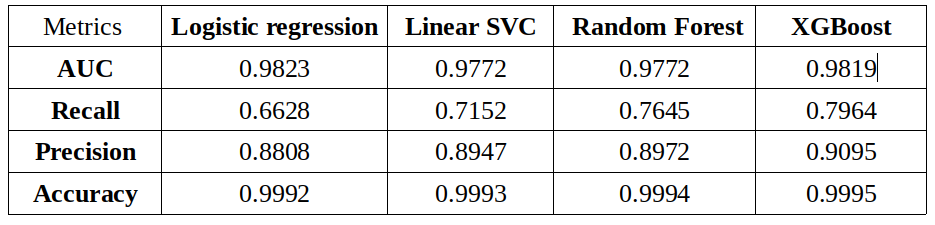

- It can be observed that the tree based models give a better F1 score compared to other models. 
- The model built using XGBoost gives the best values of AUC with the best values of Recall and Precision on the training data. So, it is chosen for prediction on the test dataset 

In [71]:
#Choosing the Best Classifier
clf=XGBClassifier(learning_rate=0.2,
                  sub_sample = 0.5,
                  max_depth=2,
                  random_state=42,
                  n_jobs=-1,
                  verbose=1)

In [72]:
clf.fit(X_train, y_train)

[13:20:58] WARNING: /workspace/src/learner.cc:480: 
Parameters: { sub_sample, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, sub_sample=0.5,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbose=1, verbosity=None)

In [73]:
# Applying the power transformer on the test dataset
X_test_pt=pd.DataFrame(pt.transform(X_test), columns=X_test.columns)

In [74]:
#Prediction
y_pred=clf.predict(X_test_pt)

In [75]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.87      0.74      0.80       148

    accuracy                           1.00     85443
   macro avg       0.93      0.87      0.90     85443
weighted avg       1.00      1.00      1.00     85443



In [76]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test,y_pred)
print(confusion)

[[85278    17]
 [   38   110]]


In [77]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Printing other performance meterics
print('Sensitivity/ Recall                  = ', TP / float(TP+FN))
print('Specificity                          = ',TN / float(TN+FP))
print('false positive rate                  = ',FP/ float(TN+FP))
print ('Positive predictive value/Precision  = ',TP / float(TP+FP))
print ('Negative predictive value            = ', TN / float(TN+FN))

Sensitivity/ Recall                  =  0.7432432432432432
Specificity                          =  0.9998006917169823
false positive rate                  =  0.00019930828301776188
Positive predictive value/Precision  =  0.8661417322834646
Negative predictive value            =  0.9995545970275213


In [78]:
P  = TP / float(TP+FP)
R = TP / float(TP+FN)
print ('F1 score :', (2*P*R)/(P+R))

F1 score : 0.8


### Model shows <font color='green'>86% precision </font> and <font color='green'> 74% recall </font>  and <font color='green'> .</font> on the imbalanced test dataset.


### Print the important features of the best model to understand the dataset


Top var = 17
2nd Top var = 14
3rd Top var = 10


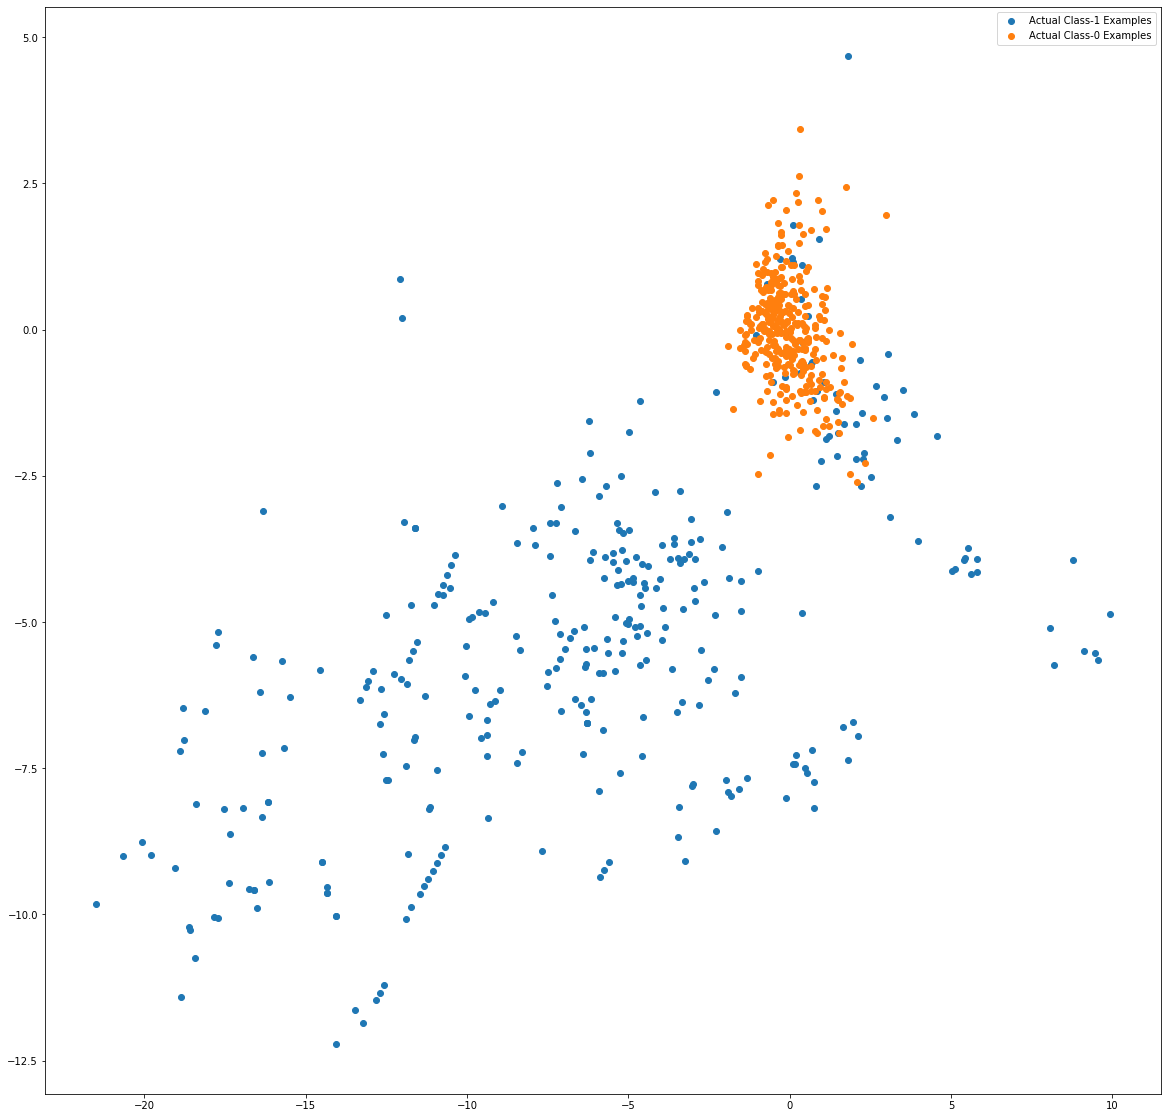

In [79]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)


plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

##  <font color=red> Balancing Classes </font>
- Models are built by setting 'class_weight'=balanced .

- The following balancing techniques are used for building models
>1. Random Oversampling
>2. SMOTE
>3. ADASYN

### Logistic Regression - class weight balanced

In [80]:
logreg = LogisticRegression(random_state=42, class_weight="balanced")

In [81]:
%%time
scores = cross_validate(logreg, X_train, y_train, 
                        scoring=scoring,
                        cv=skf,
                        return_train_score=True)

CPU times: user 3.61 s, sys: 24 ms, total: 3.64 s
Wall time: 3.64 s


In [82]:
pd.DataFrame(scores)

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_roc_auc,train_roc_auc
0,0.828597,0.063627,0.979445,0.978414,0.072454,0.069472,0.921739,0.930131,0.990000,0.988707
1,1.275965,0.058639,0.973516,0.973975,0.057558,0.059225,0.930435,0.947598,0.978050,0.993563
2,0.958316,0.058393,0.973124,0.973727,0.055319,0.058712,0.912281,0.943478,0.978412,0.993298


In [83]:
pd.DataFrame(scores).mean().sort_index()

fit_time           1.020959
score_time         0.060220
test_accuracy      0.975362
test_precision     0.061777
test_recall        0.921485
test_roc_auc       0.982154
train_accuracy     0.975372
train_precision    0.062470
train_recall       0.940403
train_roc_auc      0.991856
dtype: float64

#### Tuning the hyper-parameters

In [84]:
logreg = LogisticRegression(random_state=42, class_weight="balanced")

In [85]:
hyper_params = {'C':[0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]}

In [86]:
scoring = {'AUC':'roc_auc', 'REC':'recall', 'PRE':'precision','ACC':'accuracy'}
model_cv = GridSearchCV(logreg, 
                        cv= skf, 
                        param_grid=hyper_params,
                        return_train_score=True, 
                        scoring=scoring,
                        refit='REC')

In [87]:
%%time
model_cv.fit(X_train, y_train)

CPU times: user 23 s, sys: 156 ms, total: 23.2 s
Wall time: 23.2 s


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]},
             refit='REC', return_train_score=True,
             scoring={'ACC': 'accuracy', 'AUC': 'roc_auc', 'PRE': 'precision',
                      'REC': 'recall'})

In [88]:
cv_res = pd.DataFrame(model_cv.cv_results_)

In [89]:
model_cv.best_score_

0.9214848715992879

In [90]:
cv_res.sort_values(by='rank_test_REC')[['param_C','rank_test_REC','mean_test_REC','rank_test_AUC','mean_test_AUC']]

,param_C,rank_test_REC,mean_test_REC,rank_test_AUC,mean_test_AUC
1,0.01,1,0.921485,2,0.982407
2,0.1,1,0.921485,3,0.982196
3,1,1,0.921485,4,0.982154
4,10,1,0.921485,5,0.982149
5,100,1,0.921485,7,0.982148
6,1000,1,0.921485,6,0.982148
0,0.001,7,0.918586,1,0.983426


In [91]:
print("Best Recall: ", model_cv.best_score_)
print("Best AUC: ", cv_res.mean_test_AUC.max())

Best Recall:  0.9214848715992879
Best AUC:  0.9834259680213367


In [ ]:
# Using the best parameters for buidling model
from sklearn.model_selection import cross_validate
logreg = LogisticRegression(C=0.1,random_state=42, solver='lbfgs', max_iter=1000, n_jobs=-1)

In [92]:
scoring = ['accuracy','precision','recall','roc_auc']
scores = cross_validate(logreg, X_train, y_train,
                               scoring=scoring,cv=skf,
                               return_train_score=True)

In [93]:
pd.DataFrame(scores)

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_roc_auc,train_roc_auc
0,2.697883,0.062338,0.999278,0.999263,0.903614,0.892216,0.652174,0.650655,0.994550,0.982247
1,2.729166,0.061416,0.999263,0.999270,0.883721,0.892857,0.660870,0.655022,0.982986,0.988789
2,2.710591,0.061817,0.999218,0.999330,0.860465,0.912281,0.649123,0.678261,0.972336,0.990089


In [94]:
pd.DataFrame(scores).mean().sort_index()

fit_time           2.712547
score_time         0.061857
test_accuracy      0.999253
test_precision     0.882600
test_recall        0.654055
test_roc_auc       0.983291
train_accuracy     0.999288
train_precision    0.899118
train_recall       0.661313
train_roc_auc      0.987042
dtype: float64

### Oversampling the data - Random Over Sampling

In [24]:
from imblearn import over_sampling

In [25]:
#from imblearn import over_sampling #- import the packages
ros = over_sampling.RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

In [26]:
X_train_ros.shape

(398040, 29)

### Logistic Regression - ROS

In [98]:
logreg = LogisticRegression(random_state=42)

In [99]:
np.unique(y_train_ros, return_counts=True)

(array([0, 1]), array([199020, 199020]))

In [100]:
scoring = {'AUC':'roc_auc', 'REC':'recall', 'PRE':'precision','ACC':'accuracy'}

In [101]:
%%time
scores = cross_validate(logreg, X_train_ros, y_train_ros, 
                        scoring=scoring,
                        cv=skf,
                        return_train_score=True)

CPU times: user 6.07 s, sys: 40 ms, total: 6.11 s
Wall time: 6.11 s


In [102]:
pd.DataFrame(scores)

,fit_time,score_time,test_AUC,train_AUC,test_REC,train_REC,test_PRE,train_PRE,test_ACC,train_ACC
0,1.688427,0.120399,0.990385,0.990400,0.931761,0.932409,0.976108,0.975193,0.954477,0.954345
1,1.427288,0.128149,0.990430,0.990372,0.932605,0.931987,0.974668,0.975274,0.954183,0.954179
2,1.770514,0.129856,0.990387,0.990464,0.932213,0.932183,0.974489,0.975026,0.953904,0.954153


<font color="red">**Note: these estimates are over-optimistic as sampling has been done before the CV steps** <font>  
     - To get a better estimate, we need to include over-sampling in the CV steps

In [103]:
from sklearn.metrics import roc_auc_score, recall_score, precision_score, accuracy_score

In [104]:
def get_perf(model, X_test, y_test):
    y_test_prob = model.predict_proba(X_test)
    y_test_pred = model.predict(X_test)
    return (roc_auc_score(y_test, y_test_prob[:,1]), 
            recall_score(y_test, y_test_pred),
            precision_score(y_test, y_test_pred))

In [105]:
%%time
cv_res = pd.DataFrame(columns=['Test_AUC','Test_Recall','Test_Precision'])

for train_ind, test_ind in skf.split(X_train, y_train):
    #Dividing into train and test sets
    X_train_fold = X_train.iloc[train_ind,:]; y_train_fold = y_train.iloc[train_ind]
    X_test_fold = X_train.iloc[test_ind,:]; y_test_fold = y_train.iloc[test_ind]
    #Oversampling
    ros = over_sampling.RandomOverSampler(random_state=42)
    X_train_ros, y_train_ros = ros.fit_resample(X_train_fold, y_train_fold)
    #Instantiating the model
    logreg = LogisticRegression(random_state=42)
    #Scoring the model
    logreg.fit(X_train_ros, y_train_ros)
    #rf.fit(X_train_ros, y_train_ros)
    perf = get_perf(logreg, X_test_fold, y_test_fold)
    cv_res = pd.concat([cv_res, 
                       pd.DataFrame(perf, index=['Test_AUC','Test_Recall','Test_Precision']).T],
                       axis=0, 
                       ignore_index=True)

CPU times: user 6.56 s, sys: 88 ms, total: 6.65 s
Wall time: 6.65 s


In [106]:
cv_res

,Test_AUC,Test_Recall,Test_Precision
0,0.990211,0.921739,0.072060
1,0.977914,0.930435,0.057558
2,0.978603,0.912281,0.055378


In [107]:
cv_res.mean().sort_index()

Test_AUC          0.982243
Test_Precision    0.061665
Test_Recall       0.921485
dtype: float64

A high value of AUC and Recall are observed while precision drops significantly

Imblearn pipeline is used for implementing Oversampling and GridSearchCV 

### Using imblearn pipelines to include sampling as part of CV + Grid Search

In [108]:
from imblearn.pipeline import Pipeline, make_pipeline

In [109]:
imba_pipeline = make_pipeline(over_sampling.RandomOverSampler(random_state=42), 
                               logreg)

In [110]:
hyper_params = {
                'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],
               }
new_params = {'logisticregression__' + key: hyper_params[key] for key in hyper_params}
new_params

{'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [111]:
scoring = {'AUC':'roc_auc', 'REC':'recall', 'PRE':'precision','ACC':'accuracy'}

In [112]:
grid_imba = RandomizedSearchCV(imba_pipeline, 
                         param_distributions=new_params, 
                         cv=skf, 
                         scoring=scoring,
                         return_train_score=True,
                         n_iter=50,
                         refit = "REC",
                         n_jobs=-1,
                         verbose=1)

In [113]:
%%time
grid_imba.fit(X_train, y_train)

Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:   24.6s finished


CPU times: user 2.59 s, sys: 104 ms, total: 2.69 s
Wall time: 27.1 s


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('randomoversampler',
                                              RandomOverSampler(random_state=42)),
                                             ('logisticregression',
                                              LogisticRegression(random_state=42))]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'logisticregression__C': [0.001, 0.01,
                                                                  0.1, 1, 10,
                                                                  100, 1000]},
                   refit='REC', return_train_score=True,
                   scoring={'ACC': 'accuracy', 'AUC': 'roc_auc',
                            'PRE': 'precision', 'REC': 'recall'},
                   verbose=1)

In [114]:
cv_res = pd.DataFrame(grid_imba.cv_results_)
cv_res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logisticregression__C,params,split0_test_AUC,split1_test_AUC,split2_test_AUC,mean_test_AUC,std_test_AUC,rank_test_AUC,split0_train_AUC,split1_train_AUC,split2_train_AUC,mean_train_AUC,std_train_AUC,split0_test_REC,split1_test_REC,split2_test_REC,mean_test_REC,std_test_REC,rank_test_REC,split0_train_REC,split1_train_REC,split2_train_REC,mean_train_REC,std_train_REC,split0_test_PRE,split1_test_PRE,split2_test_PRE,mean_test_PRE,std_test_PRE,rank_test_PRE,split0_train_PRE,split1_train_PRE,split2_train_PRE,mean_train_PRE,std_train_PRE,split0_test_ACC,split1_test_ACC,split2_test_ACC,mean_test_ACC,std_test_ACC,rank_test_ACC,split0_train_ACC,split1_train_ACC,split2_train_ACC,mean_train_ACC,std_train_ACC
0,2.714857,0.075313,0.132075,0.017261,0.001,{'logisticregression__C': 0.001},0.990438,0.978656,0.980091,0.983062,0.005249,1,0.988118,0.992541,0.992316,0.990992,0.002034,0.921739,0.930435,0.912281,0.921485,0.007414,1,0.925764,0.925764,0.926087,0.925872,0.000152,0.086885,0.071238,0.065327,0.074483,0.009095,1,0.083105,0.070502,0.070020,0.074542,0.006058,0.983101,0.978888,0.977458,0.979816,0.002395,1,0.982274,0.978843,0.978587,0.979901,0.001681
1,3.599075,0.346568,0.143542,0.005931,0.01,{'logisticregression__C': 0.01},0.990187,0.978181,0.978868,0.982412,0.005505,2,0.988574,0.993258,0.993094,0.991642,0.002171,0.921739,0.930435,0.912281,0.921485,0.007414,1,0.930131,0.947598,0.943478,0.940403,0.007455,0.075499,0.061921,0.057143,0.064854,0.007775,2,0.072696,0.062178,0.060955,0.065276,0.005270,0.980333,0.975487,0.974027,0.976616,0.002695,2,0.979437,0.975284,0.974750,0.976490,0.002095
2,4.374160,0.600433,0.148678,0.010655,0.1,{'logisticregression__C': 0.1},0.990216,0.977969,0.978634,0.982273,0.005623,3,0.988696,0.993489,0.993254,0.991813,0.002206,0.921739,0.930435,0.912281,0.921485,0.007414,1,0.930131,0.947598,0.943478,0.940403,0.007455,0.072802,0.058374,0.055794,0.062323,0.007484,3,0.069517,0.059978,0.059225,0.062907,0.004684,0.979550,0.973907,0.973365,0.975607,0.002797,3,0.978429,0.974321,0.973967,0.975572,0.002025
3,4.591928,0.677848,0.125614,0.003349,1,{'logisticregression__C': 1},0.990217,0.977918,0.978608,0.982247,0.005642,4,0.988709,0.993520,0.993270,0.991833,0.002211,0.921739,0.930435,0.912281,0.921485,0.007414,1,0.930131,0.947598,0.943478,0.940403,0.007455,0.072060,0.057558,0.055378,0.061665,0.007404,4,0.069044,0.059403,0.058855,0.062434,0.004679,0.979324,0.973516,0.973154,0.975332,0.002827,4,0.978271,0.974057,0.973794,0.975374,0.002051
4,4.169115,0.678173,0.116771,0.002698,10,{'logisticregression__C': 10},0.990215,0.977910,0.978605,0.982243,0.005644,5,0.988711,0.993522,0.993271,0.991835,0.002211,0.921739,0.930435,0.912281,0.921485,0.007414,1,0.930131,0.947598,0.943478,0.940403,0.007455,0.071864,0.057527,0.055408,0.061600,0.007310,5,0.068910,0.059419,0.058871,0.062400,0.004608,0.979264,0.973501,0.973169,0.975311,0.002798,5,0.978226,0.974065,0.973802,0.975364,0.002026
5,4.183616,0.890706,0.112705,0.023633,100,{'logisticregression__C': 100},0.990216,0.977909,0.978604,0.982243,0.005645,6,0.988712,0.993523,0.993271,0.991835,0.002211,0.921739,0.930435,0.912281,0.921485,0.007414,1,0.930131,0.947598,0.943478,0.940403,0.007455,0.071816,0.057527,0.055408,0.061583,0.007287,6,0.068910,0.059419,0.058871,0.062400,0.004608,0.979249,0.973501,0.973169,0.975306,0.002791,6,0.978226,0.974065,0.973802,0.975364,0.002026
6,3.908930,0.833594,0.108848,0.012190,1000,{'logisticregression__C': 1000},0.990216,0.977909,0.978604,0.982243,0.005645,7,0.988712,0.993523,0.993271,0.991835,0.002211,0.921739,0.930435,0.912281,0.921485,0.007414,1,0.930131,0.947598,0.943478,0.940403,0.007455,0.071816,0.057527,0.055408,0.061583,0.007287,6,0.068910,0.059419,0.058871,0.062400,0.004608,0.979249,0.973501,0.973169,0.975306,0.002791,6,0.978226,0.974065,0.973802,0.975364,0.002026


In [115]:
cv_res.sort_values(by='rank_test_REC')[['param_logisticregression__C','rank_test_REC','mean_test_REC','rank_test_AUC','mean_test_AUC','mean_test_PRE']]

,param_logisticregression__C,rank_test_REC,mean_test_REC,rank_test_AUC,mean_test_AUC,mean_test_PRE
0,0.001,1,0.921485,1,0.983062,0.074483
1,0.01,1,0.921485,2,0.982412,0.064854
2,0.1,1,0.921485,3,0.982273,0.062323
3,1,1,0.921485,4,0.982247,0.061665
4,10,1,0.921485,5,0.982243,0.061600
5,100,1,0.921485,6,0.982243,0.061583
6,1000,1,0.921485,7,0.982243,0.061583


**Best recall scores and estimator**

In [116]:
print("Best Recall: ", grid_imba.best_score_)
print("Best AUC: ", cv_res.mean_test_AUC.max())

Best Recall:  0.9214848715992879
Best AUC:  0.9830617083204268


In [117]:
grid_imba.best_estimator_

Pipeline(steps=[('randomoversampler', RandomOverSampler(random_state=42)),
                ('logisticregression',
                 LogisticRegression(C=0.001, random_state=42))])

In [118]:
# Using the best parameters for buidling model
from sklearn.model_selection import cross_validate
logreg = LogisticRegression(C=0.001,random_state=42, solver='lbfgs', max_iter=1000, n_jobs=-1)

In [119]:
lr_ros = Pipeline([
        ('sampling', over_sampling.RandomOverSampler(random_state=100)),
        ('lr', logreg)
    ])

In [120]:
%%time
scoring = ['accuracy','precision','recall','roc_auc']
scores = cross_validate(lr_ros, X_train, y_train,
                               scoring=scoring,cv=skf,
                               return_train_score=True)

CPU times: user 1.4 s, sys: 104 ms, total: 1.51 s
Wall time: 14.7 s


In [121]:
pd.DataFrame(scores)

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_roc_auc,train_roc_auc
0,4.858640,0.068428,0.982981,0.982251,0.086319,0.083333,0.921739,0.930131,0.989942,0.988141
1,4.807692,0.062802,0.978798,0.978715,0.070955,0.070390,0.930435,0.930131,0.979065,0.992663
2,4.402183,0.062848,0.977699,0.978692,0.065990,0.070343,0.912281,0.926087,0.979772,0.992413


In [122]:
pd.DataFrame(scores).mean().sort_index()

fit_time           4.689505
score_time         0.064692
test_accuracy      0.979826
test_precision     0.074421
test_recall        0.921485
test_roc_auc       0.982927
train_accuracy     0.979886
train_precision    0.074689
train_recall       0.928783
train_roc_auc      0.991072
dtype: float64

## Linear SVC + ROS

In [128]:
svc = LinearSVC(random_state=42, tol=1e-5)

In [129]:
imba_pipeline = make_pipeline(over_sampling.RandomOverSampler(random_state=42), 
                               svc)

In [267]:
hyper_params = {
                'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
               }
new_params = {'linearsvc__' + key: hyper_params[key] for key in hyper_params}
new_params

{'linearsvc__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}

In [268]:
grid_imba = RandomizedSearchCV(imba_pipeline, 
                         param_distributions=new_params, 
                         cv=skf, 
                         scoring=scoring,
                         return_train_score=True,
                         n_iter=10,
                         refit = "REC",
                         n_jobs=-1,
                         verbose=10)

In [269]:
grid_imba.fit(X_train, y_train)

C:\Users\rahim.baig\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_search.py:282: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   25.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  12 out of  24 | elapsed:  4.2min remaining:  4.2min
[Parallel(n_jobs=-1)]: Done  15 out of  24 | elapsed:  5.1min remaining:  3.1min
[Parallel(n_jobs=-1)]: Done  18 out of  24 | elapsed:  6.1min remaining:  2.0min
[Parallel(n_jobs=-1)]: Done  21 out of  24 | elapsed:  7.4min remaining:  1.1min
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  7.8min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  7.8min finished
C:\Users\rahim.baig\AppData\Roaming\Python\Python36\site-packages\sklearn\svm\_base.py:975: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=0, shuffle=True),
                   estimator=Pipeline(steps=[('randomoversampler',
                                              RandomOverSampler(random_state=42)),
                                             ('linearsvc',
                                              LinearSVC(random_state=42,
                                                        tol=1e-05))]),
                   n_jobs=-1,
                   param_distributions={'linearsvc__C': [0.001, 0.01, 0.1, 1,
                                                         10, 100, 1000,
                                                         10000]},
                   refit='REC', return_train_score=True,
                   scoring={'AUC': 'roc_auc', 'PRE': 'precision',
                            'REC': 'recall'},
                   verbose=10)

In [270]:
cv_res = pd.DataFrame(grid_imba.cv_results_)

In [271]:
cv_res.sort_values(by='rank_test_REC')[['param_linearsvc__C','rank_test_REC','mean_test_REC','rank_test_AUC','mean_test_AUC','mean_test_PRE']]

,param_linearsvc__C,rank_test_REC,mean_test_REC,rank_test_AUC,mean_test_AUC,mean_test_PRE
4,10,1,0.913279,5,0.975443,0.049645
1,0.01,2,0.902439,3,0.975724,0.066591
2,0.1,2,0.902439,4,0.975681,0.066238
3,1,2,0.902439,1,0.975875,0.062865
0,0.001,5,0.899729,2,0.975850,0.066781
6,1000,5,0.899729,6,0.966842,0.038421
5,100,7,0.886179,8,0.962230,0.042241
7,10000,8,0.880759,7,0.962425,0.033977


In [123]:
#Using the best hyperparameter
svc = LinearSVC(C=1,random_state=42, tol=1e-5)

In [124]:
svc_ros = Pipeline([
        ('sampling', over_sampling.RandomOverSampler(random_state=42)),
        ('svc', svc)
    ])

In [125]:
%%time
scoring = ['accuracy','precision','recall','roc_auc']
scores = cross_validate(svc_ros, X_train, y_train, 
                        scoring=scoring,
                        cv=skf,
                        return_train_score=True)

CPU times: user 2min 25s, sys: 168 ms, total: 2min 25s
Wall time: 2min 25s


In [126]:
pd.DataFrame(scores)

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_roc_auc,train_roc_auc
0,54.018620,0.058550,0.982861,0.981830,0.085761,0.081226,0.921739,0.925764,0.990930,0.988338
1,44.962099,0.058359,0.978301,0.978263,0.069435,0.069579,0.930435,0.938865,0.977535,0.993184
2,46.217428,0.058713,0.975517,0.976917,0.060430,0.065257,0.912281,0.926087,0.978622,0.993004


In [127]:
pd.DataFrame(scores).mean().sort_index()

fit_time           48.399382
score_time          0.058541
test_accuracy       0.978893
test_precision      0.071875
test_recall         0.921485
test_roc_auc        0.982362
train_accuracy      0.979003
train_precision     0.072021
train_recall        0.930239
train_roc_auc       0.991509
dtype: float64

## RandomForest  + ROS

In [128]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [129]:
imba_pipeline = make_pipeline(over_sampling.RandomOverSampler(random_state=42), 
                               rf)

In [130]:
hyper_params = {
                'max_depth':[5, 10],
                'min_samples_split':[10,20,30]
               }

In [131]:
new_params = {'randomforestclassifier__' + key: hyper_params[key] for key in hyper_params}
new_params

{'randomforestclassifier__max_depth': [5, 10],
 'randomforestclassifier__min_samples_split': [10, 20, 30]}

In [132]:
scoring = {'AUC': 'roc_auc', 'REC': 'recall', 'PRE': 'precision'}

In [133]:
grid_imba = RandomizedSearchCV(imba_pipeline, 
                               param_distributions=new_params, 
                               cv=skf, 
                               scoring=scoring,
                               n_iter=50,
                               refit = "REC",
                               n_jobs=-1,
                               return_train_score=True,
                               verbose=1)

In [134]:
grid_imba.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  9.8min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('randomoversampler',
                                              RandomOverSampler(random_state=42)),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(n_jobs=-1,
                                                                     random_state=42))]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'randomforestclassifier__max_depth': [5,
                                                                              10],
                                        'randomforestclassifier__min_samples_split': [10,
                                                                                      20,
                                                                                      30]},
                   refit='REC', return_train_scor

In [135]:
cv_res = pd.DataFrame(grid_imba.cv_results_)

In [136]:
cv_res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestclassifier__min_samples_split,param_randomforestclassifier__max_depth,params,split0_test_AUC,split1_test_AUC,split2_test_AUC,mean_test_AUC,std_test_AUC,rank_test_AUC,split0_train_AUC,split1_train_AUC,split2_train_AUC,mean_train_AUC,std_train_AUC,split0_test_REC,split1_test_REC,split2_test_REC,mean_test_REC,std_test_REC,rank_test_REC,split0_train_REC,split1_train_REC,split2_train_REC,mean_train_REC,std_train_REC,split0_test_PRE,split1_test_PRE,split2_test_PRE,mean_test_PRE,std_test_PRE,rank_test_PRE,split0_train_PRE,split1_train_PRE,split2_train_PRE,mean_train_PRE,std_train_PRE
0,96.737550,0.042469,1.434110,0.056395,10,5,{'randomforestclassifier__min_samples_split': ...,0.986456,0.969621,0.976889,0.977655,0.006894,1,0.996577,0.998648,0.998443,0.997889,0.000932,0.869565,0.869565,0.868421,0.869184,0.000539,1,0.930131,0.947598,0.943478,0.940403,0.007455,0.450450,0.335570,0.402439,0.396153,0.047110,4,0.442827,0.364706,0.447423,0.418319,0.037956
1,91.428162,7.634704,1.844351,0.101299,20,5,{'randomforestclassifier__min_samples_split': ...,0.986456,0.969621,0.976889,0.977655,0.006894,1,0.996577,0.998648,0.998443,0.997889,0.000932,0.869565,0.869565,0.868421,0.869184,0.000539,1,0.930131,0.947598,0.943478,0.940403,0.007455,0.450450,0.335570,0.402439,0.396153,0.047110,4,0.442827,0.364706,0.447423,0.418319,0.037956
2,97.542023,0.372500,1.859770,0.087817,30,5,{'randomforestclassifier__min_samples_split': ...,0.986456,0.969621,0.976889,0.977655,0.006894,1,0.996577,0.998648,0.998443,0.997889,0.000932,0.869565,0.869565,0.868421,0.869184,0.000539,1,0.930131,0.947598,0.943478,0.940403,0.007455,0.450450,0.335570,0.402439,0.396153,0.047110,4,0.442827,0.364706,0.447423,0.418319,0.037956
3,151.392208,2.324708,2.372420,0.161370,10,10,{'randomforestclassifier__min_samples_split': ...,0.983136,0.982626,0.964774,0.976845,0.008538,4,0.999993,0.999997,0.999998,0.999996,0.000002,0.817391,0.834783,0.815789,0.822654,0.008601,4,1.000000,1.000000,1.000000,1.000000,0.000000,0.886792,0.780488,0.788136,0.818472,0.048411,1,0.877395,0.860902,0.848708,0.862335,0.011755
4,151.752920,2.409593,2.574492,0.153961,20,10,{'randomforestclassifier__min_samples_split': ...,0.983136,0.982626,0.964774,0.976845,0.008538,4,0.999993,0.999997,0.999998,0.999996,0.000002,0.817391,0.834783,0.815789,0.822654,0.008601,4,1.000000,1.000000,1.000000,1.000000,0.000000,0.886792,0.780488,0.788136,0.818472,0.048411,1,0.877395,0.860902,0.848708,0.862335,0.011755
5,108.524375,38.131569,1.457990,0.571218,30,10,{'randomforestclassifier__min_samples_split': ...,0.983136,0.982626,0.964774,0.976845,0.008538,4,0.999993,0.999997,0.999998,0.999996,0.000002,0.817391,0.834783,0.815789,0.822654,0.008601,4,1.000000,1.000000,1.000000,1.000000,0.000000,0.886792,0.780488,0.788136,0.818472,0.048411,1,0.877395,0.860902,0.848708,0.862335,0.011755


In [137]:
cv_res.sort_values(by='rank_test_REC')[['param_randomforestclassifier__max_depth','param_randomforestclassifier__min_samples_split','rank_test_REC','mean_test_REC','rank_test_AUC','mean_test_AUC','mean_test_PRE']]

,param_randomforestclassifier__max_depth,param_randomforestclassifier__min_samples_split,rank_test_REC,mean_test_REC,rank_test_AUC,mean_test_AUC,mean_test_PRE
0,5,10,1,0.869184,1,0.977655,0.396153
1,5,20,1,0.869184,1,0.977655,0.396153
2,5,30,1,0.869184,1,0.977655,0.396153
3,10,10,4,0.822654,4,0.976845,0.818472
4,10,20,4,0.822654,4,0.976845,0.818472
5,10,30,4,0.822654,4,0.976845,0.818472


In [138]:
print("Best Recall: ", grid_imba.best_score_)
print("Best parameters:", grid_imba.best_params_)
print("Best AUC: ", cv_res.mean_test_AUC.max())

Best Recall:  0.8691838291380626
Best parameters: {'randomforestclassifier__min_samples_split': 10, 'randomforestclassifier__max_depth': 5}
Best AUC:  0.9776554165755451


In [139]:
rfc_ros = RandomForestClassifier(bootstrap=True,
                                max_depth= 5,
                                min_samples_split=10,
                                random_state=42,
                                n_jobs=-1,
                                verbose=1)

In [140]:
mod_rfc_ros = Pipeline([
                       ('sampling', over_sampling.RandomOverSampler(random_state=42)),
                       ('rfc', rfc_ros)
                       ])

In [141]:
scoring = ['accuracy','precision','recall','roc_auc']
scores_rf_ros = cross_validate(mod_rfc_ros, X_train, y_train, 
                               scoring=scoring,
                               cv=skf, return_train_score=True)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   23.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=

In [142]:
pd.DataFrame(scores_rf_ros)

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_roc_auc,train_roc_auc
0,23.790507,0.609471,0.997938,0.997863,0.450450,0.442827,0.869565,0.930131,0.986456,0.996577
1,24.511289,0.494901,0.996795,0.997066,0.335570,0.364706,0.869565,0.947598,0.969621,0.998648
2,27.901988,0.499909,0.997562,0.997886,0.402439,0.447423,0.868421,0.943478,0.976889,0.998443


In [143]:
pd.DataFrame(scores_rf_ros).mean().sort_index()

fit_time           25.401261
score_time          0.534760
test_accuracy       0.997432
test_precision      0.396153
test_recall         0.869184
test_roc_auc        0.977655
train_accuracy      0.997605
train_precision     0.418319
train_recall        0.940403
train_roc_auc       0.997889
dtype: float64

## XGBoost +ROS

In [144]:
xgb = XGBClassifier(max_depth=2, n_jobs=-1, base_score=0.5) # Fixing a lower value of depth and tuning other parameters

In [145]:
imba_pipeline = make_pipeline(over_sampling.RandomOverSampler(random_state=42), 
                               xgb)

In [146]:
hyper_params = {
                'n_estimators':[50, 100],
                'lr':[0.1, 0.2, 0,5, 0.6, 0.8, 1]
               }
new_params = {'xgbclassifier__' + key: hyper_params[key] for key in hyper_params}
new_params

{'xgbclassifier__n_estimators': [50, 100],
 'xgbclassifier__lr': [0.1, 0.2, 0, 5, 0.6, 0.8, 1]}

In [147]:
grid_imba = RandomizedSearchCV(imba_pipeline, 
                         param_distributions=new_params, 
                         cv=skf, 
                         scoring='roc_auc',
                         return_train_score=True,
                         n_iter=10,
                         refit = "REC",
                         n_jobs=-1,
                         verbose=10)

In [118]:
grid_imba.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:  7.7min remaining:   51.5s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  8.1min finished


[21:04:00] WARNING: /workspace/src/learner.cc:480: 
Parameters: { lr } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=0, shuffle=True),
                   estimator=Pipeline(steps=[('randomoversampler',
                                              RandomOverSampler(random_state=42)),
                                             ('xgbclassifier',
                                              XGBClassifier(base_score=0.5,
                                                            booster=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_bytree=None,
                                                            gamma=None,
                                                            gpu_id=None,
                                                            importance_type='gain',
                                                            interaction_const

In [123]:
grid_imba.best_params_

{'xgbclassifier__n_estimators': 100, 'xgbclassifier__lr': 0.1}

In [126]:
grid_imba.best_score_

0.9829149374651275

In [151]:
xgb_ros = XGBClassifier(max_depth=2,
                        n_estimators= 100,
                        lr= 0.1,
                        n_jobs=-1,
                        random_state=42)

In [152]:
mod_xgb_ros = Pipeline([
                        ('sampling', over_sampling.RandomOverSampler(random_state=42)),
                        ('xgb', xgb_ros)
                      ])

In [153]:
score = ['accuracy','precision','recall','roc_auc']
scores = cross_validate(mod_xgb_ros, X_train, y_train,
                        scoring=score,
                        cv=skf, 
                        return_train_score=True)

[19:06:26] WARNING: /workspace/src/learner.cc:480: 
Parameters: { lr } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:07:06] WARNING: /workspace/src/learner.cc:480: 
Parameters: { lr } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:07:43] WARNING: /workspace/src/learner.cc:480: 
Parameters: { lr } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [154]:
pd.DataFrame(scores)

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_roc_auc,train_roc_auc
0,39.358150,0.363715,0.998555,0.998766,0.553672,0.582697,0.852174,1.0,0.983036,0.999923
1,35.589379,0.360689,0.997923,0.998503,0.449782,0.535047,0.895652,1.0,0.980244,0.999944
2,35.393482,0.361777,0.997953,0.998360,0.449541,0.513393,0.859649,1.0,0.975858,0.999938


In [155]:
pd.DataFrame(scores).mean().sort_index()

fit_time           36.780337
score_time          0.362060
test_accuracy       0.998144
test_precision      0.484332
test_recall         0.869158
test_roc_auc        0.979713
train_accuracy      0.998543
train_precision     0.543712
train_recall        1.000000
train_roc_auc       0.999935
dtype: float64

## Using SMOTE

### Print the class distribution after applying SMOTE 

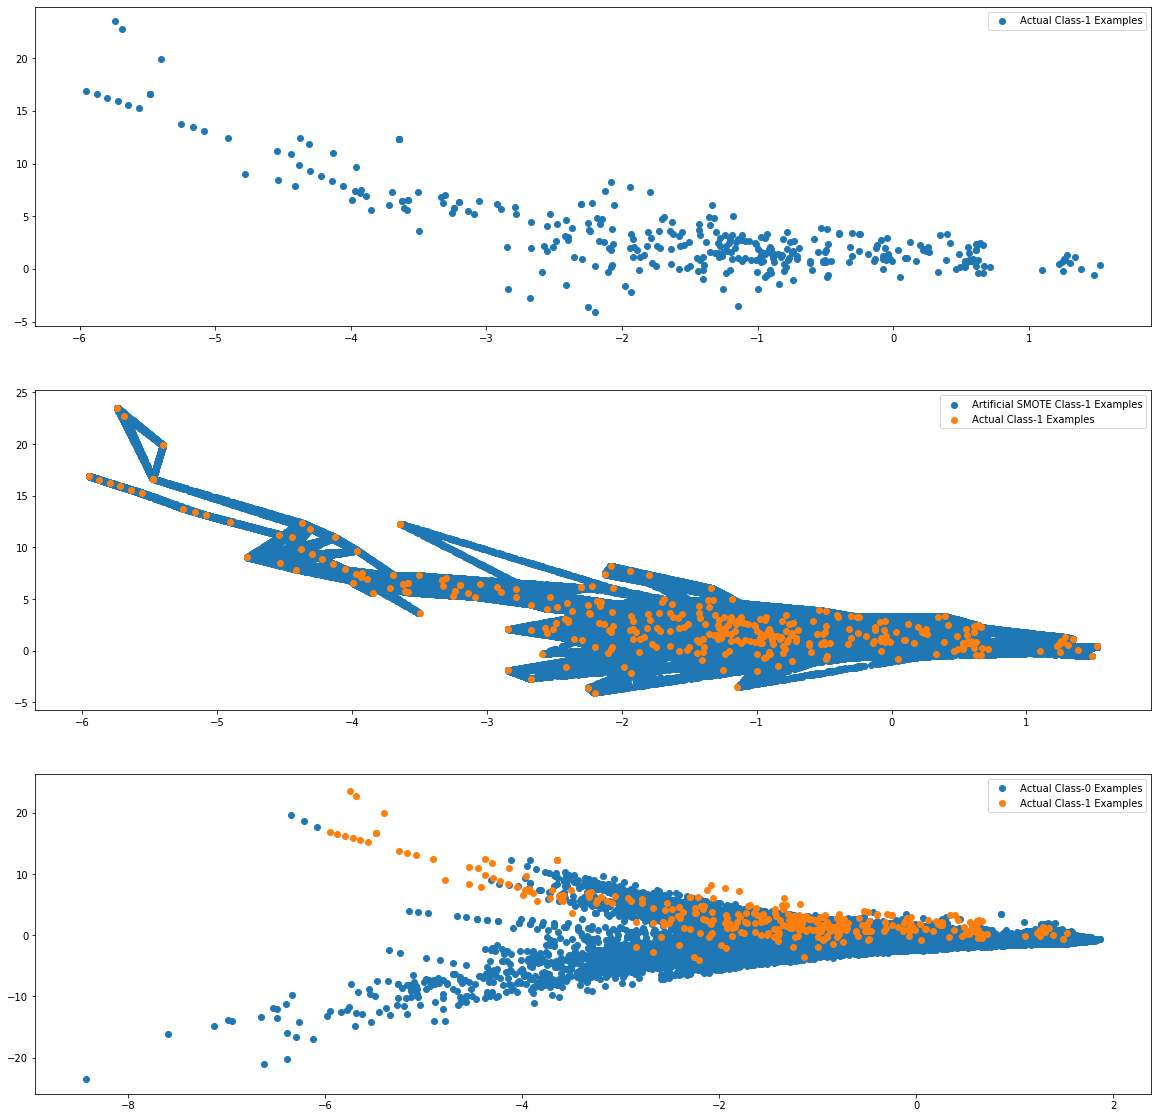

In [156]:
sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)

plt.scatter(X_train_smote_1.iloc[:X_train_smote_1.shape[0], 0], X_train_smote_1.iloc[:X_train_smote_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)

plt.scatter(X_train_0[:X_train_0.shape[0], 0], X_train_0[:X_train_0.shape[0], 1], label='Actual Class-0 Examples')
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

## Logistic Regression +SMOTE

In [157]:
logreg = LogisticRegression(random_state=42)

In [158]:
imba_pipeline = make_pipeline(over_sampling.SMOTE(random_state=42), 
                               logreg)

In [159]:
hyper_params = {
                'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],
               }
new_params = {'logisticregression__' + key: hyper_params[key] for key in hyper_params}
new_params

{'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [160]:
scoring = {'AUC': 'roc_auc', 'REC': 'recall', 'PRE': 'precision'}

In [161]:
grid_imba = RandomizedSearchCV(imba_pipeline, 
                         param_distributions=new_params, 
                         cv=skf, 
                         scoring=scoring,
                         return_train_score=True,
                         n_iter=50,
                         refit = "REC",
                         n_jobs=-1,
                         verbose=10)

In [162]:
%%time
grid_imba.fit(X_train, y_train)

Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done  17 out of  21 | elapsed:   20.9s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:   24.2s finished


CPU times: user 3.46 s, sys: 192 ms, total: 3.65 s
Wall time: 27.6 s


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                             ('logisticregression',
                                              LogisticRegression(random_state=42))]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'logisticregression__C': [0.001, 0.01,
                                                                  0.1, 1, 10,
                                                                  100, 1000]},
                   refit='REC', return_train_score=True,
                   scoring={'AUC': 'roc_auc', 'PRE': 'precision',
                            'REC': 'recall'},
                   verbose=10)

In [163]:
cv_res = pd.DataFrame(grid_imba.cv_results_)

In [164]:
cv_res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logisticregression__C,params,split0_test_AUC,split1_test_AUC,split2_test_AUC,mean_test_AUC,std_test_AUC,rank_test_AUC,split0_train_AUC,split1_train_AUC,split2_train_AUC,mean_train_AUC,std_train_AUC,split0_test_REC,split1_test_REC,split2_test_REC,mean_test_REC,std_test_REC,rank_test_REC,split0_train_REC,split1_train_REC,split2_train_REC,mean_train_REC,std_train_REC,split0_test_PRE,split1_test_PRE,split2_test_PRE,mean_test_PRE,std_test_PRE,rank_test_PRE,split0_train_PRE,split1_train_PRE,split2_train_PRE,mean_train_PRE,std_train_PRE
0,2.973402,0.153630,0.123272,0.004891,0.001,{'logisticregression__C': 0.001},0.985110,0.980428,0.979274,0.981604,0.002523,1,0.987777,0.992019,0.991463,0.990420,0.001882,0.930435,0.921739,0.912281,0.921485,0.007414,7,0.930131,0.930131,0.943478,0.934580,0.006292,0.073946,0.070013,0.064436,0.069465,0.003902,1,0.070274,0.070135,0.069285,0.069898,0.000437
1,3.113516,0.251661,0.140436,0.054018,0.01,{'logisticregression__C': 0.01},0.984855,0.979770,0.978617,0.981081,0.002710,2,0.987976,0.992825,0.992439,0.991080,0.002201,0.921739,0.939130,0.921053,0.927307,0.008365,2,0.930131,0.938865,0.947826,0.938941,0.007224,0.064991,0.061927,0.058398,0.061772,0.002694,2,0.062281,0.061995,0.061756,0.062011,0.000214
2,3.781377,1.106474,0.100374,0.009315,0.1,{'logisticregression__C': 0.1},0.984794,0.979105,0.978470,0.980790,0.002843,3,0.988017,0.993091,0.992656,0.991255,0.002296,0.930435,0.939130,0.921053,0.930206,0.007382,1,0.930131,0.943231,0.947826,0.940396,0.007497,0.062941,0.058568,0.057158,0.059556,0.002462,3,0.060323,0.059603,0.060321,0.060082,0.000339
3,3.915287,1.195991,0.142030,0.010008,1,{'logisticregression__C': 1},0.984758,0.978948,0.978455,0.980720,0.002862,4,0.988020,0.993129,0.992681,0.991277,0.002310,0.930435,0.930435,0.921053,0.927307,0.004423,2,0.930131,0.943231,0.947826,0.940396,0.007497,0.062464,0.057807,0.056787,0.059019,0.002471,7,0.060152,0.059097,0.060055,0.059768,0.000476
4,3.210859,0.341023,0.116720,0.026733,10,{'logisticregression__C': 10},0.984755,0.978929,0.978456,0.980713,0.002864,5,0.988020,0.993132,0.992683,0.991278,0.002311,0.930435,0.930435,0.921053,0.927307,0.004423,2,0.930131,0.943231,0.947826,0.940396,0.007497,0.062464,0.057838,0.056757,0.059019,0.002475,4,0.060102,0.059033,0.060072,0.059735,0.000497
5,3.702636,0.377791,0.120750,0.004330,100,{'logisticregression__C': 100},0.984753,0.978929,0.978456,0.980713,0.002864,6,0.988019,0.993132,0.992683,0.991278,0.002312,0.930435,0.930435,0.921053,0.927307,0.004423,2,0.930131,0.943231,0.947826,0.940396,0.007497,0.062464,0.057838,0.056757,0.059019,0.002475,4,0.060102,0.059049,0.060088,0.059746,0.000493
6,3.062886,0.411139,0.131558,0.054047,1000,{'logisticregression__C': 1000},0.984753,0.978929,0.978456,0.980712,0.002864,7,0.988019,0.993132,0.992683,0.991278,0.002312,0.930435,0.930435,0.921053,0.927307,0.004423,2,0.930131,0.943231,0.947826,0.940396,0.007497,0.062464,0.057838,0.056757,0.059019,0.002475,4,0.060102,0.059049,0.060088,0.059746,0.000493


In [165]:
cv_res.sort_values(by='rank_test_REC')[['param_logisticregression__C','rank_test_REC','mean_test_REC','rank_test_AUC','mean_test_AUC','mean_test_PRE']]

,param_logisticregression__C,rank_test_REC,mean_test_REC,rank_test_AUC,mean_test_AUC,mean_test_PRE
2,0.1,1,0.930206,3,0.980790,0.059556
1,0.01,2,0.927307,2,0.981081,0.061772
3,1,2,0.927307,4,0.980720,0.059019
4,10,2,0.927307,5,0.980713,0.059019
5,100,2,0.927307,6,0.980713,0.059019
6,1000,2,0.927307,7,0.980712,0.059019
0,0.001,7,0.921485,1,0.981604,0.069465


**Best recall scores and estimator**

In [166]:
print("Best Recall: ", grid_imba.best_score_)
print("Best AUC: ", cv_res.mean_test_AUC.max())

Best Recall:  0.9302059496567505
Best AUC:  0.9816038155995653


In [167]:
grid_imba.best_estimator_

Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('logisticregression',
                 LogisticRegression(C=0.1, random_state=42))])

In [305]:
# Using the best parameters for buidling model
logreg = LogisticRegression(C=0.1,random_state=42, solver='lbfgs', max_iter=1000, n_jobs=-1)

In [306]:
lr_sm = Pipeline([
        ('sampling', over_sampling.SMOTE(random_state=42)),
        ('lr', logreg)
    ])

In [307]:
%%time
score = ['accuracy','precision','recall','roc_auc']
scores = cross_validate(lr_sm, X_train, y_train,
                               scoring=score,cv=skf,
                               return_train_score=True)

CPU times: user 1.45 s, sys: 328 ms, total: 1.78 s
Wall time: 26.4 s


In [308]:
pd.DataFrame(scores)

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_roc_auc,train_roc_auc
0,6.599564,0.088470,0.975909,0.974915,0.062941,0.060323,0.930435,0.930131,0.984794,0.988017
1,11.828533,0.069251,0.973772,0.974261,0.058568,0.059603,0.939130,0.943231,0.979105,0.993091
2,7.231520,0.063777,0.973801,0.974359,0.057158,0.060321,0.921053,0.947826,0.978470,0.992656


In [309]:
pd.DataFrame(scores).mean().sort_index()

fit_time           8.553206
score_time         0.073833
test_accuracy      0.974494
test_precision     0.059556
test_recall        0.930206
test_roc_auc       0.980790
train_accuracy     0.974511
train_precision    0.060082
train_recall       0.940396
train_roc_auc      0.991255
dtype: float64

## LinearSVC + SMOTE

In [155]:
svc = LinearSVC(random_state=42)

In [156]:
imba_pipeline = make_pipeline(over_sampling.SMOTE(random_state=42), 
                               svc)

In [300]:
hyper_params = {
                'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],
               }
new_params = {'linearsvc__' + key: hyper_params[key] for key in hyper_params}
new_params

{'linearsvc__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [301]:
grid_imba = RandomizedSearchCV(imba_pipeline, 
                         param_distributions=new_params, 
                         cv=skf, 
                         scoring=scoring,
                         return_train_score=True,
                         n_iter=10,
                         refit = "REC",
                         n_jobs=-1,
                         verbose=10)

In [302]:
grid_imba.fit(X_train, y_train)

C:\Users\rahim.baig\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_search.py:282: UserWarning: The total space of parameters 7 is smaller than n_iter=10. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   23.4s
[Parallel(n_jobs=-1)]: Done   9 out of  21 | elapsed: 12.6min remaining: 16.7min
[Parallel(n_jobs=-1)]: Done  12 out of  21 | elapsed: 12.6min remaining:  9.4min
[Parallel(n_jobs=-1)]: Done  15 out of  21 | elapsed: 15.7min remaining:  6.3min
[Parallel(n_jobs=-1)]: Done  18 out of  21 | elapsed: 15.9min remaining:  2.6min
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed: 17.2min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed: 17.2min finished
C:\Users\rahim.baig\AppData\Roaming\Python\Python36\site-packages\sklearn\svm\_base.py:975: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=0, shuffle=True),
                   estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                             ('linearsvc',
                                              LinearSVC(random_state=42))]),
                   n_jobs=-1,
                   param_distributions={'linearsvc__C': [0.001, 0.01, 0.1, 1,
                                                         10, 100, 1000]},
                   refit='REC', return_train_score=True,
                   scoring={'AUC': 'roc_auc', 'PRE': 'precision',
                            'REC': 'recall'},
                   verbose=10)

In [305]:
cv_res = pd.DataFrame(grid_imba.cv_results_)

In [304]:
cv_res.sort_values(by='rank_test_REC')[['param_linearsvc__C','rank_test_REC','mean_test_REC','rank_test_AUC','mean_test_AUC','mean_test_PRE']]

,param_linearsvc__C,rank_test_REC,mean_test_REC,rank_test_AUC,mean_test_AUC,mean_test_PRE
5,100,1,0.921409,5,0.972368,0.026023
6,1000,2,0.905149,7,0.948490,0.017194
0,0.001,3,0.897019,1,0.972876,0.061829
1,0.01,3,0.897019,3,0.972699,0.060962
2,0.1,3,0.897019,4,0.972643,0.060563
3,1,3,0.897019,2,0.972872,0.057044
4,10,7,0.897019,6,0.971259,0.048261


Here C=1 is chosen for model building

In [173]:
#Using the best hyperparameter
svc = LinearSVC(C=1,random_state=42, tol=1e-5)

In [174]:
svc_sm = Pipeline([
        ('sampling', over_sampling.SMOTE(random_state=42)),
        ('svc', svc)
         ])

In [175]:
%%time
scores = cross_validate(svc_sm, X_train, y_train, 
                        scoring=score,
                        cv=skf,
                        return_train_score=True)

CPU times: user 2min 31s, sys: 200 ms, total: 2min 31s
Wall time: 2min 31s


In [176]:
pd.DataFrame(scores)

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_roc_auc,train_roc_auc
0,53.219121,0.058588,0.979821,0.978798,0.073713,0.070647,0.921739,0.930131,0.985265,0.988144
1,48.666619,0.058737,0.978045,0.978030,0.068678,0.068612,0.930435,0.934498,0.979177,0.992685
2,48.938497,0.059710,0.976480,0.977105,0.062764,0.066831,0.912281,0.943478,0.979231,0.992399


In [177]:
pd.DataFrame(scores).mean().sort_index()

fit_time           50.274746
score_time          0.059011
test_accuracy       0.978115
test_precision      0.068385
test_recall         0.921485
test_roc_auc        0.981224
train_accuracy      0.977977
train_precision     0.068696
train_recall        0.936036
train_roc_auc       0.991076
dtype: float64

## RandomForest + SMOTE

In [310]:
rf = RandomForestClassifier(warm_start=True,random_state=42, n_jobs=-1,min_samples_leaf=100)

In [311]:
imba_pipeline = make_pipeline(over_sampling.SMOTE(random_state=42), 
                               rf)

In [315]:
hyper_params = {'max_depth':[5,8,10]
               }
new_params = {'randomforestclassifier__' + key: hyper_params[key] for key in hyper_params}
new_params

{'randomforestclassifier__max_depth': [5, 8, 10]}

In [316]:
scoring = {'AUC': 'roc_auc', 'REC': 'recall', 'PRE': 'precision'}

In [317]:
grid_imba = RandomizedSearchCV(imba_pipeline, 
                         param_distributions=new_params, 
                         cv=skf, 
                         scoring=scoring,
                         return_train_score=True,
                         n_iter=10,
                         refit = "REC",
                         n_jobs=-1,
                         verbose=10)

In [318]:
grid_imba.fit(X_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   9 | elapsed:  2.5min remaining:  5.1min
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:  3.7min remaining:  4.7min
[Parallel(n_jobs=-1)]: Done   5 out of   9 | elapsed:  6.5min remaining:  5.2min
[Parallel(n_jobs=-1)]: Done   6 out of   9 | elapsed:  6.6min remaining:  3.3min
[Parallel(n_jobs=-1)]: Done   7 out of   9 | elapsed:  7.1min remaining:  2.0min
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  8.4min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  8.4min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(min_samples_leaf=100,
                                                                     n_jobs=-1,
                                                                     random_state=42,
                                                                     warm_start=True))]),
                   n_jobs=-1,
                   param_distributions={'randomforestclassifier__max_depth': [5,
                                                                              8,
                                                                              10]},
                   refit='REC', return_train_score=True,
                   scoring={'AUC': 'roc_auc', 'PRE': 'precision',
                    

In [319]:
cv_res = pd.DataFrame(grid_imba.cv_results_)

In [320]:
cv_res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestclassifier__max_depth,params,split0_test_AUC,split1_test_AUC,split2_test_AUC,mean_test_AUC,std_test_AUC,rank_test_AUC,split0_train_AUC,split1_train_AUC,split2_train_AUC,mean_train_AUC,std_train_AUC,split0_test_REC,split1_test_REC,split2_test_REC,mean_test_REC,std_test_REC,rank_test_REC,split0_train_REC,split1_train_REC,split2_train_REC,mean_train_REC,std_train_REC,split0_test_PRE,split1_test_PRE,split2_test_PRE,mean_test_PRE,std_test_PRE,rank_test_PRE,split0_train_PRE,split1_train_PRE,split2_train_PRE,mean_train_PRE,std_train_PRE
0,145.671925,0.459124,1.917914,0.123758,5,{'randomforestclassifier__max_depth': 5},0.983982,0.979785,0.980292,0.981353,0.001871,3,0.995155,0.997371,0.995902,0.996143,0.000920,0.860870,0.886957,0.885965,0.877930,0.012071,1,0.912664,0.930131,0.934783,0.925859,0.009522,0.275766,0.244604,0.208678,0.243016,0.027412,3,0.284741,0.263288,0.218941,0.255657,0.027399
1,223.178714,7.081868,3.052607,0.312386,8,{'randomforestclassifier__max_depth': 8},0.987384,0.980660,0.980513,0.982852,0.003205,1,0.999488,0.999827,0.999606,0.999640,0.000140,0.852174,0.878261,0.877193,0.869209,0.012054,2,0.969432,0.995633,0.986957,0.984007,0.010898,0.355072,0.351916,0.260417,0.322469,0.043896,2,0.372483,0.393782,0.315278,0.360514,0.033148
2,200.889617,64.421884,1.941499,0.835787,10,{'randomforestclassifier__max_depth': 10},0.987015,0.982365,0.978377,0.982586,0.003530,2,0.999860,0.999914,0.999895,0.999890,0.000022,0.852174,0.886957,0.868421,0.869184,0.014210,3,0.982533,1.000000,0.991304,0.991279,0.007131,0.426087,0.401575,0.315287,0.380983,0.047520,1,0.436893,0.459839,0.404255,0.433663,0.022807


In [321]:
cv_res.sort_values(by='rank_test_REC')[['param_randomforestclassifier__max_depth','rank_test_REC','mean_test_REC','rank_test_AUC','mean_test_AUC','mean_test_PRE']]

,param_randomforestclassifier__max_depth,rank_test_REC,mean_test_REC,rank_test_AUC,mean_test_AUC,mean_test_PRE
0,5,1,0.877930,3,0.981353,0.243016
1,8,2,0.869209,1,0.982852,0.322469
2,10,3,0.869184,2,0.982586,0.380983


A depth of 8 will give the ebst AUC 

In [186]:
rfc_sm = RandomForestClassifier(bootstrap=True,
                                max_depth= 8,
                                min_samples_leaf=100,
                                random_state=42,
                                n_jobs=-1,
                                verbose=1)

In [187]:
mod_rfc_sm = Pipeline([
                      ('sampling', over_sampling.SMOTE(random_state=42)),
                      ('rfc', rfc_sm)
                     ])

In [188]:
%%time
scores = cross_validate(mod_rfc_sm, X_train, y_train, 
                        scoring=score,
                        cv=skf,
                        return_train_score=True)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   56.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=

CPU times: user 20.8 s, sys: 400 ms, total: 21.2 s
Wall time: 2min 58s


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.7s finished


In [189]:
pd.DataFrame(scores)

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_roc_auc,train_roc_auc
0,56.689596,1.147291,0.997066,0.997133,0.355072,0.372483,0.852174,0.969432,0.987384,0.999488
1,57.798338,0.912473,0.996990,0.997352,0.351916,0.393782,0.878261,0.995633,0.980660,0.999827
2,55.929638,0.915613,0.995516,0.996268,0.260417,0.315278,0.877193,0.986957,0.980513,0.999606


In [190]:
pd.DataFrame(scores).mean().sort_index()

fit_time           56.805857
score_time          0.991792
test_accuracy       0.996524
test_precision      0.322469
test_recall         0.869209
test_roc_auc        0.982852
train_accuracy      0.996918
train_precision     0.360514
train_recall        0.984007
train_roc_auc       0.999640
dtype: float64

## XGBoost +SMOTE

In [191]:
xgb = XGBClassifier(random_state=42,max_depth=2, n_jobs=-1)

In [192]:
imba_pipeline = make_pipeline(over_sampling.SMOTE(random_state=42), 
                               xgb)

In [193]:
hyper_params = {
                'sub_sample':[0.5,0.8,1],
               }
new_params = {'xgbclassifier__' + key: hyper_params[key] for key in hyper_params}
new_params

{'xgbclassifier__sub_sample': [0.5, 0.8, 1]}

In [194]:
grid_imba = RandomizedSearchCV(imba_pipeline, 
                         param_distributions=new_params, 
                         cv=skf, 
                         scoring=scoring,
                         return_train_score=True,
                         n_iter=10,
                         refit = "REC",
                         n_jobs=-1,
                         verbose=10)

In [195]:
grid_imba.fit(X_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   9 | elapsed:  2.3min remaining:  4.6min
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:  2.4min remaining:  3.0min
[Parallel(n_jobs=-1)]: Done   5 out of   9 | elapsed:  4.6min remaining:  3.7min
[Parallel(n_jobs=-1)]: Done   6 out of   9 | elapsed:  4.8min remaining:  2.4min
[Parallel(n_jobs=-1)]: Done   7 out of   9 | elapsed:  4.8min remaining:  1.4min
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  5.6min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  5.6min finished


[19:29:45] WARNING: /workspace/src/learner.cc:480: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                             ('xgbclassifier',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_bytree=None,
                                                            gamma=None,
                                                            gpu_id=None,
                                                            importance_type='gain',
                                                            interaction_constraints=None,
                                                       

In [196]:
cv_res = pd.DataFrame(grid_imba.cv_results_)

In [197]:
cv_res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_xgbclassifier__sub_sample,params,split0_test_AUC,split1_test_AUC,split2_test_AUC,mean_test_AUC,std_test_AUC,rank_test_AUC,split0_train_AUC,split1_train_AUC,split2_train_AUC,mean_train_AUC,std_train_AUC,split0_test_REC,split1_test_REC,split2_test_REC,mean_test_REC,std_test_REC,rank_test_REC,split0_train_REC,split1_train_REC,split2_train_REC,mean_train_REC,std_train_REC,split0_test_PRE,split1_test_PRE,split2_test_PRE,mean_test_PRE,std_test_PRE,rank_test_PRE,split0_train_PRE,split1_train_PRE,split2_train_PRE,mean_train_PRE,std_train_PRE
0,136.943093,1.243054,0.654629,0.129254,0.5,{'xgbclassifier__sub_sample': 0.5},0.974283,0.977665,0.979489,0.977146,0.002157,1,0.999702,0.99979,0.999779,0.999757,0.000039,0.869565,0.895652,0.885965,0.883727,0.010767,1,0.995633,1.0,0.995652,0.997095,0.002054,0.224215,0.212371,0.181329,0.205972,0.018084,1,0.232891,0.25,0.227861,0.236917,0.009476
1,134.658545,1.747295,0.686240,0.105379,0.8,{'xgbclassifier__sub_sample': 0.8},0.974283,0.977665,0.979489,0.977146,0.002157,1,0.999702,0.99979,0.999779,0.999757,0.000039,0.869565,0.895652,0.885965,0.883727,0.010767,1,0.995633,1.0,0.995652,0.997095,0.002054,0.224215,0.212371,0.181329,0.205972,0.018084,1,0.232891,0.25,0.227861,0.236917,0.009476
2,106.494256,34.240320,0.615330,0.153289,1,{'xgbclassifier__sub_sample': 1},0.974283,0.977665,0.979489,0.977146,0.002157,1,0.999702,0.99979,0.999779,0.999757,0.000039,0.869565,0.895652,0.885965,0.883727,0.010767,1,0.995633,1.0,0.995652,0.997095,0.002054,0.224215,0.212371,0.181329,0.205972,0.018084,1,0.232891,0.25,0.227861,0.236917,0.009476


In [198]:
cv_res.sort_values(by='rank_test_REC')[['param_xgbclassifier__sub_sample','rank_test_REC','mean_test_REC','rank_test_AUC','mean_test_AUC','mean_test_PRE']]

,param_xgbclassifier__sub_sample,rank_test_REC,mean_test_REC,rank_test_AUC,mean_test_AUC,mean_test_PRE
0,0.5,1,0.883727,1,0.977146,0.205972
1,0.8,1,0.883727,1,0.977146,0.205972
2,1,1,0.883727,1,0.977146,0.205972


Since all sub_samples give same recall and AUC,0.5 is chosen

In [199]:
xgb = XGBClassifier(max_depth=2,
                    sub_sample= 0.5,
                    n_jobs=-1,
                    random_state=42)

In [200]:
xgb_sm = Pipeline([
                    ('sampling', over_sampling.SMOTE(random_state=42)),
                    ('xgb', xgb)
                      ])

In [201]:
scores = cross_validate(xgb_sm, X_train, y_train,
                        scoring=score,
                        cv=skf, 
                        return_train_score=True)

[19:31:18] WARNING: /workspace/src/learner.cc:480: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:32:25] WARNING: /workspace/src/learner.cc:480: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:33:17] WARNING: /workspace/src/learner.cc:480: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find a

In [202]:
pd.DataFrame(scores)

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_roc_auc,train_roc_auc
0,65.139841,0.506293,0.994568,0.994342,0.224215,0.232891,0.869565,0.995633,0.974283,0.999702
1,51.748568,0.380238,0.994071,0.994831,0.212371,0.250000,0.895652,1.000000,0.977665,0.999790
2,57.921749,0.398433,0.992942,0.994154,0.181329,0.227861,0.885965,0.995652,0.979489,0.999779


In [203]:
pd.DataFrame(scores).mean().sort_index()

fit_time           58.270053
score_time          0.428321
test_accuracy       0.993860
test_precision      0.205972
test_recall         0.883727
test_roc_auc        0.977146
train_accuracy      0.994442
train_precision     0.236917
train_recall        0.997095
train_roc_auc       0.999757
dtype: float64

## Using ADASYN

### Print the class distribution after applying ADASYN

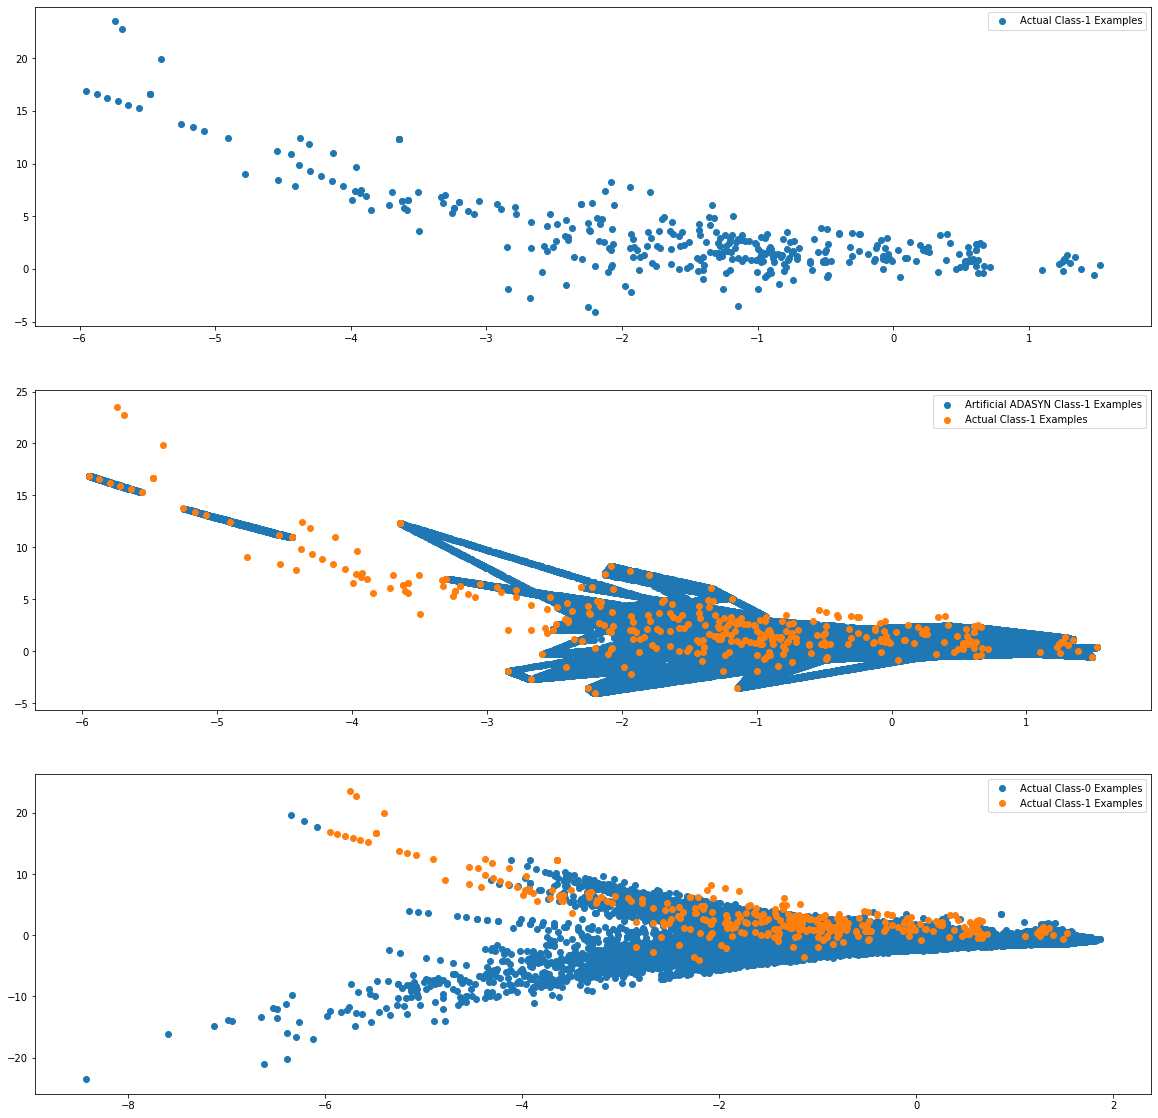

In [204]:
from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_adasyn_1.iloc[:X_train_adasyn_1.shape[0], 0], X_train_adasyn_1.iloc[:X_train_adasyn_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_0[:X_train_0.shape[0], 0], X_train_0[:X_train_0.shape[0], 1], label='Actual Class-0 Examples')
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')

plt.legend()

## Logistic Regression + ADASYN

In [205]:
logreg = LogisticRegression(random_state=42)

In [206]:
imba_pipeline = make_pipeline(over_sampling.ADASYN(random_state=42), 
                               logreg)

In [207]:
hyper_params = {
                'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],
               }
new_params = {'logisticregression__' + key: hyper_params[key] for key in hyper_params}
new_params

{'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [208]:
grid_imba = RandomizedSearchCV(imba_pipeline, 
                         param_distributions=new_params, 
                         cv=skf, 
                         scoring=scoring,
                         return_train_score=True,
                         n_iter=50,
                         refit = "REC",
                         n_jobs=-1,
                         verbose=10)

In [209]:
grid_imba.fit(X_train, y_train)

Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   24.9s
[Parallel(n_jobs=-1)]: Done  17 out of  21 | elapsed:   39.0s remaining:    9.2s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:   44.7s finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('adasyn',
                                              ADASYN(random_state=42)),
                                             ('logisticregression',
                                              LogisticRegression(random_state=42))]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'logisticregression__C': [0.001, 0.01,
                                                                  0.1, 1, 10,
                                                                  100, 1000]},
                   refit='REC', return_train_score=True,
                   scoring={'AUC': 'roc_auc', 'PRE': 'precision',
                            'REC': 'recall'},
                   verbose=10)

In [210]:
cv_res = pd.DataFrame(grid_imba.cv_results_)

In [211]:
cv_res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logisticregression__C,params,split0_test_AUC,split1_test_AUC,split2_test_AUC,mean_test_AUC,std_test_AUC,rank_test_AUC,split0_train_AUC,split1_train_AUC,split2_train_AUC,mean_train_AUC,std_train_AUC,split0_test_REC,split1_test_REC,split2_test_REC,mean_test_REC,std_test_REC,rank_test_REC,split0_train_REC,split1_train_REC,split2_train_REC,mean_train_REC,std_train_REC,split0_test_PRE,split1_test_PRE,split2_test_PRE,mean_test_PRE,std_test_PRE,rank_test_PRE,split0_train_PRE,split1_train_PRE,split2_train_PRE,mean_train_PRE,std_train_PRE
0,5.796242,0.486927,0.137521,0.012030,0.001,{'logisticregression__C': 0.001},0.982055,0.979111,0.976083,0.979083,0.002438,1,0.988247,0.992834,0.992596,0.991226,0.002108,0.956522,0.956522,0.921053,0.944699,0.016720,1,0.947598,0.965066,0.965217,0.959294,0.008270,0.028198,0.021756,0.024368,0.024774,0.002645,1,0.027207,0.021997,0.025907,0.025037,0.002214
1,7.615710,1.179606,0.181527,0.013459,0.01,{'logisticregression__C': 0.01},0.982753,0.978220,0.975283,0.978752,0.003073,2,0.988687,0.993634,0.993495,0.991939,0.002300,0.965217,0.947826,0.921053,0.944699,0.018165,1,0.951965,0.969432,0.973913,0.965103,0.009469,0.025290,0.021661,0.024306,0.023752,0.001532,2,0.024467,0.021958,0.026047,0.024157,0.001683
2,8.492323,1.245636,0.115046,0.003067,0.1,{'logisticregression__C': 0.1},0.982901,0.977346,0.975099,0.978449,0.003279,3,0.988746,0.993775,0.993704,0.992075,0.002354,0.965217,0.947826,0.921053,0.944699,0.018165,1,0.951965,0.969432,0.973913,0.965103,0.009469,0.024194,0.021576,0.024521,0.023430,0.001318,3,0.023621,0.021876,0.026031,0.023843,0.001704
3,9.278521,0.752879,0.132159,0.016730,1,{'logisticregression__C': 1},0.982904,0.977132,0.974929,0.978322,0.003363,4,0.988751,0.993790,0.993733,0.992091,0.002362,0.965217,0.947826,0.921053,0.944699,0.018165,1,0.951965,0.969432,0.973913,0.965103,0.009469,0.024104,0.021537,0.024590,0.023411,0.001339,4,0.023499,0.021792,0.025992,0.023761,0.001724
4,7.573451,0.837062,0.123878,0.006872,10,{'logisticregression__C': 10},0.982905,0.977107,0.974910,0.978307,0.003372,5,0.988750,0.993791,0.993736,0.992093,0.002363,0.965217,0.947826,0.921053,0.944699,0.018165,1,0.951965,0.969432,0.973913,0.965103,0.009469,0.024099,0.021503,0.024579,0.023394,0.001351,5,0.023476,0.021799,0.025983,0.023753,0.001719
5,6.948265,0.722261,0.119109,0.003375,100,{'logisticregression__C': 100},0.982905,0.977103,0.974908,0.978305,0.003374,6,0.988751,0.993792,0.993737,0.992093,0.002364,0.965217,0.947826,0.921053,0.944699,0.018165,1,0.951965,0.969432,0.973913,0.965103,0.009469,0.024099,0.021503,0.024573,0.023392,0.001349,6,0.023474,0.021801,0.025983,0.023753,0.001719
6,5.836178,0.476174,0.086527,0.015003,1000,{'logisticregression__C': 1000},0.982905,0.977103,0.974908,0.978305,0.003374,7,0.988750,0.993792,0.993736,0.992093,0.002364,0.965217,0.947826,0.921053,0.944699,0.018165,1,0.951965,0.969432,0.973913,0.965103,0.009469,0.024094,0.021507,0.024573,0.023391,0.001346,7,0.023471,0.021799,0.025983,0.023751,0.001720


In [212]:
cv_res.sort_values(by='rank_test_REC')[['param_logisticregression__C','rank_test_REC','mean_test_REC','rank_test_AUC','mean_test_AUC','mean_test_PRE']]

,param_logisticregression__C,rank_test_REC,mean_test_REC,rank_test_AUC,mean_test_AUC,mean_test_PRE
0,0.001,1,0.944699,1,0.979083,0.024774
1,0.01,1,0.944699,2,0.978752,0.023752
2,0.1,1,0.944699,3,0.978449,0.023430
3,1,1,0.944699,4,0.978322,0.023411
4,10,1,0.944699,5,0.978307,0.023394
5,100,1,0.944699,6,0.978305,0.023392
6,1000,1,0.944699,7,0.978305,0.023391


C=0.001 is chosen based on the above results

In [322]:
# Using the best parameters for buidling model
logreg = LogisticRegression(C=0.001,random_state=42, solver='lbfgs', max_iter=1000, n_jobs=-1)

In [323]:
lr_ada = Pipeline([
        ('sampling', over_sampling.ADASYN(random_state=42)),
        ('lr', logreg)
    ])

In [324]:
%%time
score = ['accuracy','precision','recall','roc_auc']
scores = cross_validate(lr_ada, X_train, y_train,
                        scoring=score,cv=skf,
                        return_train_score=True)

CPU times: user 5.82 s, sys: 240 ms, total: 6.06 s
Wall time: 20.1 s


In [325]:
pd.DataFrame(scores)

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_roc_auc,train_roc_auc
0,6.126206,0.069038,0.942879,0.941531,0.028198,0.027207,0.956522,0.947598,0.982055,0.988247
1,7.331496,0.074642,0.925498,0.926010,0.021756,0.021997,0.956522,0.965066,0.979111,0.992834
2,5.985502,0.066849,0.936603,0.937138,0.024368,0.025907,0.921053,0.965217,0.976083,0.992596


In [326]:
pd.DataFrame(scores).mean().sort_index()

fit_time           6.481068
score_time         0.070176
test_accuracy      0.934993
test_precision     0.024774
test_recall        0.944699
test_roc_auc       0.979083
train_accuracy     0.934893
train_precision    0.025037
train_recall       0.959294
train_roc_auc      0.991226
dtype: float64

## LinearSVC + ADASYN

In [216]:
svc = LinearSVC(random_state=42)

In [217]:
imba_pipeline = make_pipeline(over_sampling.SMOTE(random_state=42), 
                               svc)

In [218]:
hyper_params = {
                'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
               }
new_params = {'linearsvc__' + key: hyper_params[key] for key in hyper_params}
new_params

{'linearsvc__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}

In [219]:
grid_imba = RandomizedSearchCV(imba_pipeline, 
                         param_distributions=new_params, 
                         cv=skf, 
                         scoring=scoring,
                         return_train_score=True,
                         n_iter=10,
                         refit = "REC",
                         n_jobs=-1,
                         verbose=10)

In [269]:
grid_imba.fit(X_train, y_train)

C:\Users\rahim.baig\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_search.py:282: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   25.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  12 out of  24 | elapsed:  4.2min remaining:  4.2min
[Parallel(n_jobs=-1)]: Done  15 out of  24 | elapsed:  5.1min remaining:  3.1min
[Parallel(n_jobs=-1)]: Done  18 out of  24 | elapsed:  6.1min remaining:  2.0min
[Parallel(n_jobs=-1)]: Done  21 out of  24 | elapsed:  7.4min remaining:  1.1min
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  7.8min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  7.8min finished
C:\Users\rahim.baig\AppData\Roaming\Python\Python36\site-packages\sklearn\svm\_base.py:975: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=0, shuffle=True),
                   estimator=Pipeline(steps=[('randomoversampler',
                                              RandomOverSampler(random_state=42)),
                                             ('linearsvc',
                                              LinearSVC(random_state=42,
                                                        tol=1e-05))]),
                   n_jobs=-1,
                   param_distributions={'linearsvc__C': [0.001, 0.01, 0.1, 1,
                                                         10, 100, 1000,
                                                         10000]},
                   refit='REC', return_train_score=True,
                   scoring={'AUC': 'roc_auc', 'PRE': 'precision',
                            'REC': 'recall'},
                   verbose=10)

In [270]:
cv_res = pd.DataFrame(grid_imba.cv_results_)

In [271]:
cv_res.sort_values(by='rank_test_REC')[['param_linearsvc__C','rank_test_REC','mean_test_REC','rank_test_AUC','mean_test_AUC','mean_test_PRE']]

,param_linearsvc__C,rank_test_REC,mean_test_REC,rank_test_AUC,mean_test_AUC,mean_test_PRE
4,10,1,0.913279,5,0.975443,0.049645
1,0.01,2,0.902439,3,0.975724,0.066591
2,0.1,2,0.902439,4,0.975681,0.066238
3,1,2,0.902439,1,0.975875,0.062865
0,0.001,5,0.899729,2,0.975850,0.066781
6,1000,5,0.899729,6,0.966842,0.038421
5,100,7,0.886179,8,0.962230,0.042241
7,10000,8,0.880759,7,0.962425,0.033977


Based on the above results, C=1 is chosen for model building 

In [218]:
#Using the best hyperparameter
svc = LinearSVC(C=1,random_state=42, tol=1e-5)

In [219]:
svc_ada = Pipeline([
        ('sampling', over_sampling.ADASYN(random_state=42)),
        ('svc', svc)
         ])

In [220]:
%%time
scores = cross_validate(svc_ada, X_train, y_train, 
                        scoring=score,
                        cv=skf,
                        return_train_score=True)

CPU times: user 3min 54s, sys: 528 ms, total: 3min 55s
Wall time: 3min 55s


In [221]:
pd.DataFrame(scores)

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_roc_auc,train_roc_auc
0,81.010076,0.060132,0.942292,0.941562,0.027919,0.027339,0.956522,0.951965,0.983214,0.988328
1,79.009818,0.072682,0.926356,0.926619,0.021813,0.022175,0.947826,0.965066,0.977257,0.993324
2,74.841717,0.062313,0.934331,0.935076,0.023543,0.025212,0.921053,0.969565,0.975051,0.992885


In [222]:
pd.DataFrame(scores).mean().sort_index()

fit_time           78.287204
score_time          0.065042
test_accuracy       0.934326
test_precision      0.024425
test_recall         0.941800
test_roc_auc        0.978507
train_accuracy      0.934419
train_precision     0.024909
train_recall        0.962199
train_roc_auc       0.991512
dtype: float64

## RandomForest + ADASYN

In [223]:
rf = RandomForestClassifier(n_jobs=-1, min_samples_leaf=100)

In [224]:
imba_pipeline = make_pipeline(over_sampling.ADASYN(random_state=42), 
                               rf)

In [225]:
hyper_params = {'max_depth':[13, 15, 17]
               }
new_params = {'randomforestclassifier__' + key: hyper_params[key] for key in hyper_params}
new_params

{'randomforestclassifier__max_depth': [13, 15, 17]}

In [226]:
grid_imba = RandomizedSearchCV(imba_pipeline, 
                         param_distributions=new_params, 
                         cv=skf, 
                         scoring=scoring,
                         return_train_score=True,
                         n_iter=10,
                         refit = "REC",
                         n_jobs=-1,
                         verbose=10)

In [227]:
grid_imba.fit(X_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   9 | elapsed:  4.7min remaining:  9.4min
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:  4.8min remaining:  6.0min
[Parallel(n_jobs=-1)]: Done   5 out of   9 | elapsed:  9.1min remaining:  7.2min
[Parallel(n_jobs=-1)]: Done   6 out of   9 | elapsed:  9.1min remaining:  4.5min
[Parallel(n_jobs=-1)]: Done   7 out of   9 | elapsed:  9.2min remaining:  2.6min
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed: 10.3min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed: 10.3min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('adasyn',
                                              ADASYN(random_state=42)),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(min_samples_leaf=100,
                                                                     n_jobs=-1))]),
                   n_jobs=-1,
                   param_distributions={'randomforestclassifier__max_depth': [13,
                                                                              15,
                                                                              17]},
                   refit='REC', return_train_score=True,
                   scoring={'AUC': 'roc_auc', 'PRE': 'precision',
                            'REC': 'recall'},
                   verbose=10)

In [228]:
cv_res = pd.DataFrame(grid_imba.cv_results_)

In [229]:
cv_res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestclassifier__max_depth,params,split0_test_AUC,split1_test_AUC,split2_test_AUC,mean_test_AUC,std_test_AUC,rank_test_AUC,split0_train_AUC,split1_train_AUC,split2_train_AUC,mean_train_AUC,std_train_AUC,split0_test_REC,split1_test_REC,split2_test_REC,mean_test_REC,std_test_REC,rank_test_REC,split0_train_REC,split1_train_REC,split2_train_REC,mean_train_REC,std_train_REC,split0_test_PRE,split1_test_PRE,split2_test_PRE,mean_test_PRE,std_test_PRE,rank_test_PRE,split0_train_PRE,split1_train_PRE,split2_train_PRE,mean_train_PRE,std_train_PRE
0,273.514360,1.132731,2.757727,0.133174,13,{'randomforestclassifier__max_depth': 13},0.988859,0.979646,0.978300,0.982269,0.004693,3,0.999871,0.999853,0.999890,0.999872,0.000015,0.869565,0.878261,0.868421,0.872082,0.004394,1,1.0,1.0,1.0,1.0,0.0,0.303951,0.251870,0.190019,0.248614,0.046570,3,0.322990,0.306971,0.242360,0.290774,0.034852
1,264.839965,11.913858,2.362730,0.293849,15,{'randomforestclassifier__max_depth': 15},0.989196,0.985471,0.978533,0.984400,0.004418,1,0.999897,0.999897,0.999902,0.999899,0.000002,0.869565,0.878261,0.868421,0.872082,0.004394,1,1.0,1.0,1.0,1.0,0.0,0.350877,0.325806,0.250633,0.309106,0.042594,2,0.371753,0.371753,0.319889,0.354465,0.024449
2,198.759080,90.645701,1.509323,0.574958,17,{'randomforestclassifier__max_depth': 17},0.988772,0.980490,0.981517,0.983593,0.003686,2,0.999889,0.999873,0.999926,0.999896,0.000023,0.869565,0.878261,0.868421,0.872082,0.004394,1,1.0,1.0,1.0,1.0,0.0,0.375940,0.342373,0.271233,0.329849,0.043654,1,0.408929,0.413357,0.346386,0.389557,0.030580


In [230]:
cv_res.sort_values(by='rank_test_REC')[['param_randomforestclassifier__max_depth','rank_test_REC','mean_test_REC','rank_test_AUC','mean_test_AUC','mean_test_PRE']]

,param_randomforestclassifier__max_depth,rank_test_REC,mean_test_REC,rank_test_AUC,mean_test_AUC,mean_test_PRE
0,13,1,0.872082,3,0.982269,0.248614
1,15,1,0.872082,1,0.984400,0.309106
2,17,1,0.872082,2,0.983593,0.329849


 RandomForest with AdaSyn: Max depth of 15 works best

In [327]:
rfc_ada = RandomForestClassifier(bootstrap=True,
                                max_depth=15 ,
                                min_samples_leaf=100,
                                random_state=42,
                                n_jobs=-1,
                                verbose=1)

In [328]:
mod_rfc_ada = Pipeline([
        ('sampling', over_sampling.ADASYN(random_state=42)),
        ('rfc', rfc_ada)
    ])

In [329]:
%%time
scores = cross_validate(mod_rfc_ada, X_train, y_train, 
                        scoring=score,
                        cv=skf, 
                        return_train_score=True)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   34.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.2min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=

CPU times: user 26.7 s, sys: 376 ms, total: 27 s
Wall time: 3min 52s


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.6s finished


In [330]:
pd.DataFrame(scores)

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_roc_auc,train_roc_auc
0,75.657384,0.996906,0.996990,0.997209,0.349823,0.381667,0.860870,1.0,0.984963,0.999888
1,77.982391,0.796558,0.996524,0.997291,0.317610,0.388795,0.878261,1.0,0.982741,0.999897
2,72.094552,0.688575,0.995094,0.996088,0.241463,0.306667,0.868421,1.0,0.977521,0.999911


In [331]:
pd.DataFrame(scores).mean().sort_index()

fit_time           75.244776
score_time          0.827346
test_accuracy       0.996203
test_precision      0.302966
test_recall         0.869184
test_roc_auc        0.981742
train_accuracy      0.996863
train_precision     0.359043
train_recall        1.000000
train_roc_auc       0.999899
dtype: float64

## XGBoost + ADASYN

In [236]:
xgb = XGBClassifier(n_jobs=-1)

In [237]:
imba_pipeline = make_pipeline(over_sampling.ADASYN(random_state=42), 
                               xgb)

In [238]:
hyper_params = {
                'max_depth':[2,3,5,10],
               }
new_params = {'xgbclassifier__' + key: hyper_params[key] for key in hyper_params}
new_params

{'xgbclassifier__max_depth': [2, 3, 5, 10]}

In [239]:
grid_imba = RandomizedSearchCV(imba_pipeline, 
                         param_distributions=new_params, 
                         cv=skf, 
                         scoring=scoring,
                         return_train_score=True,
                         n_iter=10,
                         refit = "REC",
                         n_jobs=-1,
                         verbose=10)

In [240]:
grid_imba.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done   7 out of  12 | elapsed:  7.1min remaining:  5.1min
[Parallel(n_jobs=-1)]: Done   9 out of  12 | elapsed: 10.3min remaining:  3.4min
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed: 13.3min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('adasyn',
                                              ADASYN(random_state=42)),
                                             ('xgbclassifier',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_bytree=None,
                                                            gamma=None,
                                                            gpu_id=None,
                                                            importance_type='gain',
                                                            interaction_constraints=None,
       

In [241]:
cv_res = pd.DataFrame(grid_imba.cv_results_)

In [242]:
cv_res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_xgbclassifier__max_depth,params,split0_test_AUC,split1_test_AUC,split2_test_AUC,mean_test_AUC,std_test_AUC,rank_test_AUC,split0_train_AUC,split1_train_AUC,split2_train_AUC,mean_train_AUC,std_train_AUC,split0_test_REC,split1_test_REC,split2_test_REC,mean_test_REC,std_test_REC,rank_test_REC,split0_train_REC,split1_train_REC,split2_train_REC,mean_train_REC,std_train_REC,split0_test_PRE,split1_test_PRE,split2_test_PRE,mean_test_PRE,std_test_PRE,rank_test_PRE,split0_train_PRE,split1_train_PRE,split2_train_PRE,mean_train_PRE,std_train_PRE
0,117.632068,0.526836,0.748484,0.019725,2,{'xgbclassifier__max_depth': 2},0.975584,0.980381,0.979956,0.978640,0.002168,4,0.999525,0.999577,0.999694,0.999598,0.000071,0.869565,0.921739,0.912281,0.901195,0.022697,1,0.995633,0.995633,1.0,0.997089,0.002059,0.107066,0.094055,0.105263,0.102128,0.005756,4,0.118688,0.108262,0.127072,0.118007,0.007694
1,181.091937,6.174649,1.035315,0.248267,3,{'xgbclassifier__max_depth': 3},0.976618,0.978043,0.986187,0.980282,0.004215,2,0.999952,0.999977,0.999979,0.999969,0.000012,0.843478,0.878261,0.877193,0.866311,0.016151,2,1.000000,1.000000,1.0,1.000000,0.000000,0.347670,0.301493,0.252525,0.300563,0.038848,3,0.404594,0.392123,0.346386,0.381034,0.025024
2,301.109694,1.214027,1.376050,0.025116,5,{'xgbclassifier__max_depth': 5},0.975340,0.981283,0.983615,0.980079,0.003484,3,1.000000,1.000000,1.000000,1.000000,0.000000,0.834783,0.834783,0.833333,0.834300,0.000683,3,1.000000,1.000000,1.0,1.000000,0.000000,0.768000,0.662069,0.664336,0.698135,0.049411,2,0.991342,0.995652,0.987124,0.991373,0.003481
3,349.802527,29.971334,1.389602,0.211478,10,{'xgbclassifier__max_depth': 10},0.983438,0.980014,0.980219,0.981224,0.001568,1,1.000000,1.000000,1.000000,1.000000,0.000000,0.843478,0.817391,0.815789,0.825553,0.012692,4,1.000000,1.000000,1.0,1.000000,0.000000,0.843478,0.764228,0.709924,0.772543,0.054840,1,1.000000,1.000000,1.000000,1.000000,0.000000


In [243]:
cv_res.sort_values(by='rank_test_REC')[['param_xgbclassifier__max_depth','rank_test_REC','mean_test_REC','rank_test_AUC','mean_test_AUC','mean_test_PRE']]

,param_xgbclassifier__max_depth,rank_test_REC,mean_test_REC,rank_test_AUC,mean_test_AUC,mean_test_PRE
0,2,1,0.901195,4,0.978640,0.102128
1,3,2,0.866311,2,0.980282,0.300563
2,5,3,0.834300,3,0.980079,0.698135
3,10,4,0.825553,1,0.981224,0.772543


Based on the above results max_depth of 2 is chosen for model_building to get a maximum recall

In [244]:
xgb = XGBClassifier(max_depth=2,n_jobs=-1)

In [245]:
xgb_ada = Pipeline([
                    ('sampling', over_sampling.ADASYN(random_state=42)),
                    ('xgb', xgb)
                      ])

In [246]:
scores = cross_validate(xgb_ada, X_train, y_train,
                        scoring=score,
                        cv=skf, 
                        return_train_score=True)

In [247]:
pd.DataFrame(scores)

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_roc_auc,train_roc_auc
0,54.733763,0.392190,0.987224,0.987254,0.107066,0.118688,0.869565,0.995633,0.975584,0.999525
1,58.295437,0.539440,0.984501,0.985863,0.094055,0.108262,0.921739,0.995633,0.980381,0.999577
2,58.776455,0.401321,0.986547,0.988112,0.105263,0.127072,0.912281,1.000000,0.979956,0.999694


In [248]:
pd.DataFrame(scores).mean().sort_index()

fit_time           57.268552
score_time          0.444317
test_accuracy       0.986091
test_precision      0.102128
test_recall         0.901195
test_roc_auc        0.978640
train_accuracy      0.987076
train_precision     0.118007
train_recall        0.997089
train_roc_auc       0.999598
dtype: float64

### Comparision of Performance metrics of different models

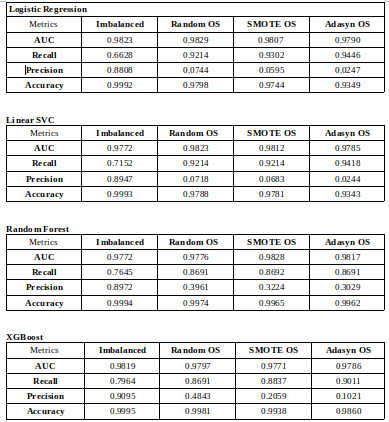

On comparing the models built by using different balancing techniques and classification algorithms, it is observed that:
- the balancing techniques increase the recall value by compromising greatly on the precision for Logistic Regression and Linear SVC.Hence they have a low F1 score.
- Tree based methods on the other hand have better F1 scorethan linear models when balanced. Adjusting the threshold could help in improving the F1 score.
- Of all the models built on balanced dataset, XGBoost balanced using ROS gives best F1 score without compromising on AUC and accuracy. Hence it is chosen for classification. 

## <font color=red> Best model - XGBoost+ ROS </font>

In [29]:
# Best Model
xgb_ros = XGBClassifier(max_depth=2,
                        n_estimators= 100,
                        lr= 0.1,
                        n_jobs=-1,
                        random_state=42)

In [30]:
# Fitting on the entire train data
xgb_ros.fit(X_train_ros,y_train_ros)

[12:13:13] WARNING: /workspace/src/learner.cc:480: 
Parameters: { lr } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, lr=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### Prediction and evaluation on Training data

In [31]:
y_train_pred = xgb_ros.predict(X_train)

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       0.39      1.00      0.56       344

    accuracy                           1.00    199364
   macro avg       0.69      1.00      0.78    199364
weighted avg       1.00      1.00      1.00    199364



In [35]:
from sklearn import metrics
print('Train auc =', metrics.roc_auc_score(y_train, y_train_pred))
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_pred)
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

Train auc = 0.9986307908752889
1


Since the data set is imbalanced, optimum threshold is chosen using precision recall curve and not ROC

### Selecting best thresholds based on precision and recall tradeoff

In [36]:
y_pred_prob = xgb_ros.predict_proba(X_train)[:,1]

In [37]:
df_scores = pd.DataFrame({},index=np.arange(0.1, 0.8, 0.1), columns=['Threshold', 'Precision','Recall'])

In [153]:
for thresh in np.arange(0.1, 1.1, 0.1):
    y_train_pred = np.where(y_pred_prob>= thresh, 1, 0)
    df_scores.loc[thresh,'Threshold'] = thresh
    df_scores.loc[thresh,'Precision'] = metrics.precision_score(y_train, y_train_pred)
    df_scores.loc[thresh,'Recall'] = metrics.recall_score(y_train, y_train_pred)

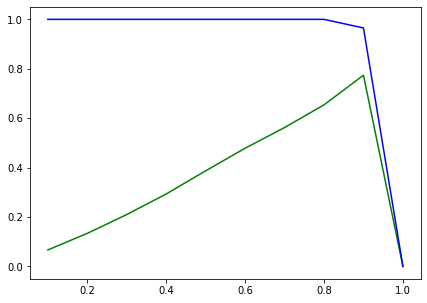

In [154]:
plt.figure(figsize=[7,5])
plt.plot(df_scores.Threshold, df_scores.Precision, color="green")
plt.plot(df_scores.Threshold, df_scores.Recall, color="blue")
plt.show()

### Choosing 0.95 as cutoff

In [155]:
thres_best = 0.95

In [156]:
y_train_pred = np.where(y_pred_prob>= thres_best, 1, 0)

In [157]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       0.82      0.91      0.86       344

    accuracy                           1.00    199364
   macro avg       0.91      0.95      0.93    199364
weighted avg       1.00      1.00      1.00    199364



In [158]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve

<Figure size 504x360 with 0 Axes>

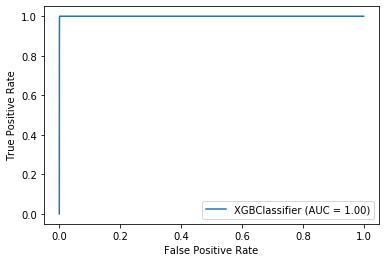

In [159]:
plt.figure(figsize=[7,5])
plot_roc_curve(xgb_ros, X_train_ros, y_train_ros)
plt.show()

<Figure size 504x360 with 0 Axes>

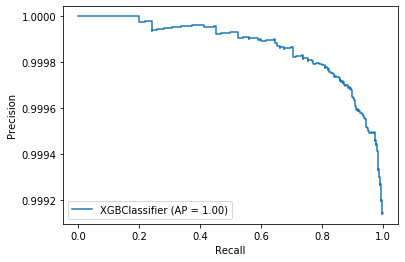

In [160]:
plt.figure(figsize=[7,5])
plot_precision_recall_curve(xgb_ros, X_train_ros, y_train_ros)
plt.show()

## Performance on the test set

In [110]:
y_test_prob = xgb_ros.predict_proba(X_test)[:,1]

In [150]:
y_test_pred= np.where(y_test_prob>=thres_bes, 1, 0)

In [151]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.74      0.80      0.77       148

    accuracy                           1.00     85443
   macro avg       0.87      0.90      0.89     85443
weighted avg       1.00      1.00      1.00     85443



<Figure size 504x360 with 0 Axes>

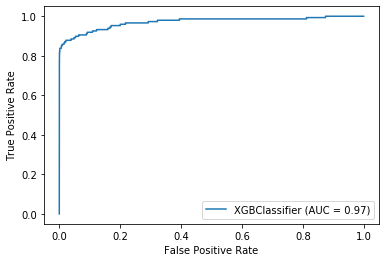

In [152]:
plt.figure(figsize=[7,5])
plot_roc_curve(xgb_ros, X_test, y_test)
plt.show()

### Model shows <font color='green'>74% precision </font> and <font color='green'> 80% recall </font>  and <font color='green'> 97% AUC </font> on the imbalanced test dataset.

### Print the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 10
3rd Top var = 12


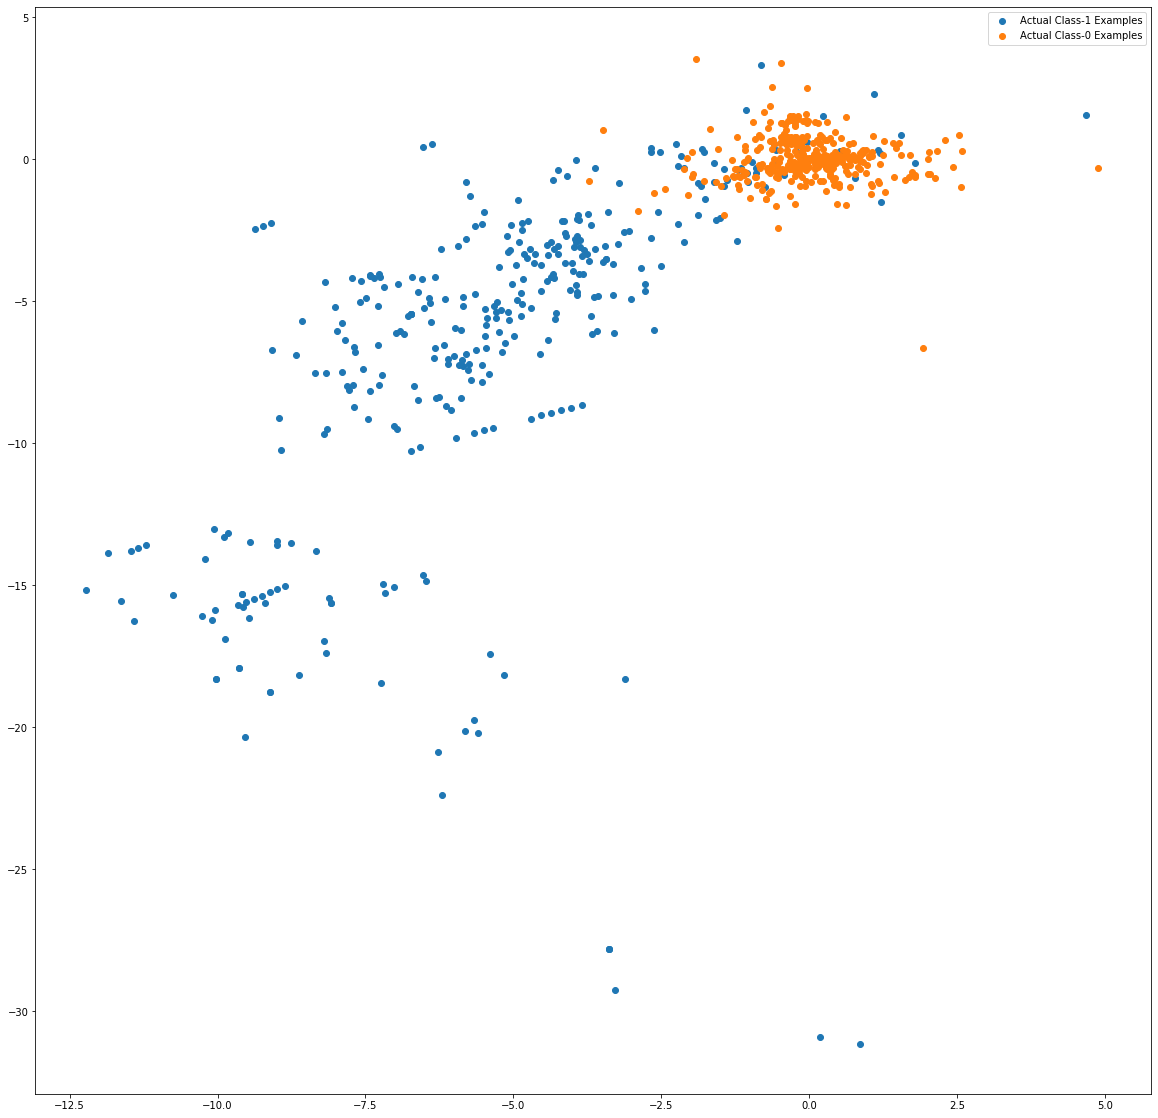

In [163]:
var_imp = []
clf=xgb_ros
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

Thus XGBoost performs well for prediction with and without balancing technique